In [1]:
# Assignment: DSC630 Term Project
# Name: Bezawada, Sashidhar
# Date: 2023-08-09
# Assignment: Milestone 4

## 1. Importing data & libraries

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import itertools
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

In [3]:
        
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')


In [4]:
df= pd.concat ([train, test])

In [5]:
#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)
print(" Shape of testing dataframe: ", test.shape)
# Drop duplicates
train.drop_duplicates()
test.drop_duplicates()
print(train.shape)
print(test.shape)

 Shape of training dataframe:  (233154, 41)
 Shape of testing dataframe:  (112392, 40)
(233154, 41)
(112392, 40)


## 2. Variable Inspection

In [6]:
print("Names of columns ", list(train.columns))

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


In [7]:
#Null values in training dataset

null= train.isnull().sum().sort_values(ascending=False)
total =train.shape[0]
percent_missing= (train.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [8]:
#Null values in test dataset

null= test.isnull().sum().sort_values(ascending=False)
total =test.shape[0]
percent_missing= (test.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           3443         0.030634
1                              UNIQUEID              0         0.000000
22                       DISBURSAL_DATE              0         0.000000
23                           ASSET_COST              0         0.000000
24                                  LTV              0         0.000000
25                            BRANCH_ID              0         0.000000
26                          SUPPLIER_ID              0         0.000000
27                      MANUFACTURER_ID              0         0.000000
28                   CURRENT_PINCODE_ID              0         0.000000
29                        DATE_OF_BIRTH              0         0.000000
30                             STATE_ID              0         0.000000
31                    PERFORM_CNS_SCORE              0         0.000000
32                     EMPLOYEE_COD

 #### Flag 1: 3443 missing values in employment type

In [9]:
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' nan]
['Salaried' 'Self employed' nan]


In [10]:
train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Missing")
test.EMPLOYMENT_TYPE= test.EMPLOYMENT_TYPE .fillna("Missing")
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' 'Missing']
['Salaried' 'Self employed' 'Missing']


In [11]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

#### Flag 2:
#### AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int. 
#### DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type



In [12]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH

train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

test[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = test['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
test[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = test['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
test["AVERAGE_ACCT_AGE"]= test["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((test["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

test[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = test['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
test[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = test['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
test["CREDIT_HISTORY_LENGTH"]= test["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((test["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [13]:
train['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
#format='%d%b%Y:%H:%M:%S.%f'
test['DATE_OF_BIRTH'] =  pd.to_datetime(test['DATE_OF_BIRTH'], format='%d-%m-%Y')
train['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')
test['DISBURSAL_DATE'] =  pd.to_datetime(test['DISBURSAL_DATE'], format='%d-%m-%Y')

## EDA

## 3.1 Class Distribution


In [14]:
class_df = train.groupby('LOAN_DEFAULT').count()['UNIQUEID'].reset_index().sort_values(by='UNIQUEID',ascending=False)
class_df.style.background_gradient(cmap='winter')


,LOAN_DEFAULT,UNIQUEID
0,0,182543
1,1,50611


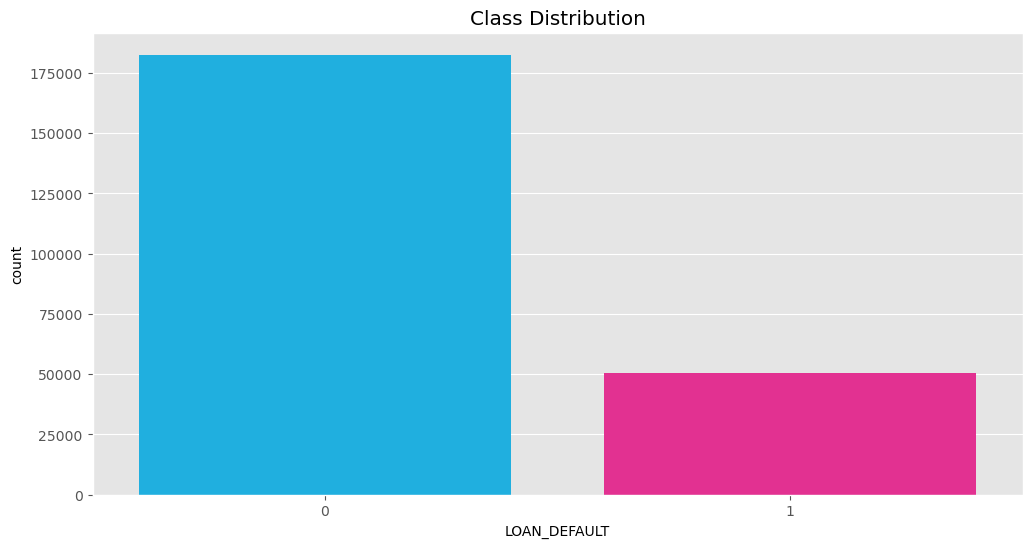

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [15]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(train[train['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(train[train['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

### Flag : Uneven class

In [16]:
print("Employment type\n")
print(train.groupby(["EMPLOYMENT_TYPE"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Mobile Flag\n")
print(train.groupby(["MOBILENO_AVL_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Aadhar Flag\n")
print(train.groupby(["AADHAR_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Pan Flag\n")
print(train.groupby(["PAN_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Voter ID Flag\n")
print(train.groupby(["VOTERID_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Driving L Flag\n")
print(train.groupby(["DRIVING_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Passport\n")
print(train.groupby(["PASSPORT_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))

Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.785407
                 1               0.214593
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: LOAN_DEFAULT, dtype: float64
##############

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.782929
                   1               0.217071
Name: LOAN_DEFAULT, dtype: float64
##############

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.743594
             1               0.256406
1            0               0.790403
             1               0.209597
Name: LOAN_DEFAULT, dtype: float64
##############

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0               0.783170
          1               0.216830
1         0               0.779978
          1               0.220022
Name: LOAN_DEFAULT, dtype: float64
##############



In [17]:

print(train.groupby(["LOAN_DEFAULT","EMPLOYMENT_TYPE","AADHAR_FLAG","PAN_FLAG","DRIVING_FLAG","PASSPORT_FLAG"]).VOTERID_FLAG.value_counts(normalize=False))
print("##############\n")


LOAN_DEFAULT  EMPLOYMENT_TYPE  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  VOTERID_FLAG
0             Missing          0            0         0             0              1                 451
                                                                    1              0                  10
                                                      1             0              0                  44
                                                                                   1                   4
                                            1         0             0              1                  16
                                                                                   0                   1
                                                      1             0              0                   1
                               1            0         0             0              0                5315
                                                                

In [18]:
train_0 = train[train["LOAN_DEFAULT"]==0]
train_1 = train[train["LOAN_DEFAULT"]==1]

## 3.2 Default vs Disbursal date


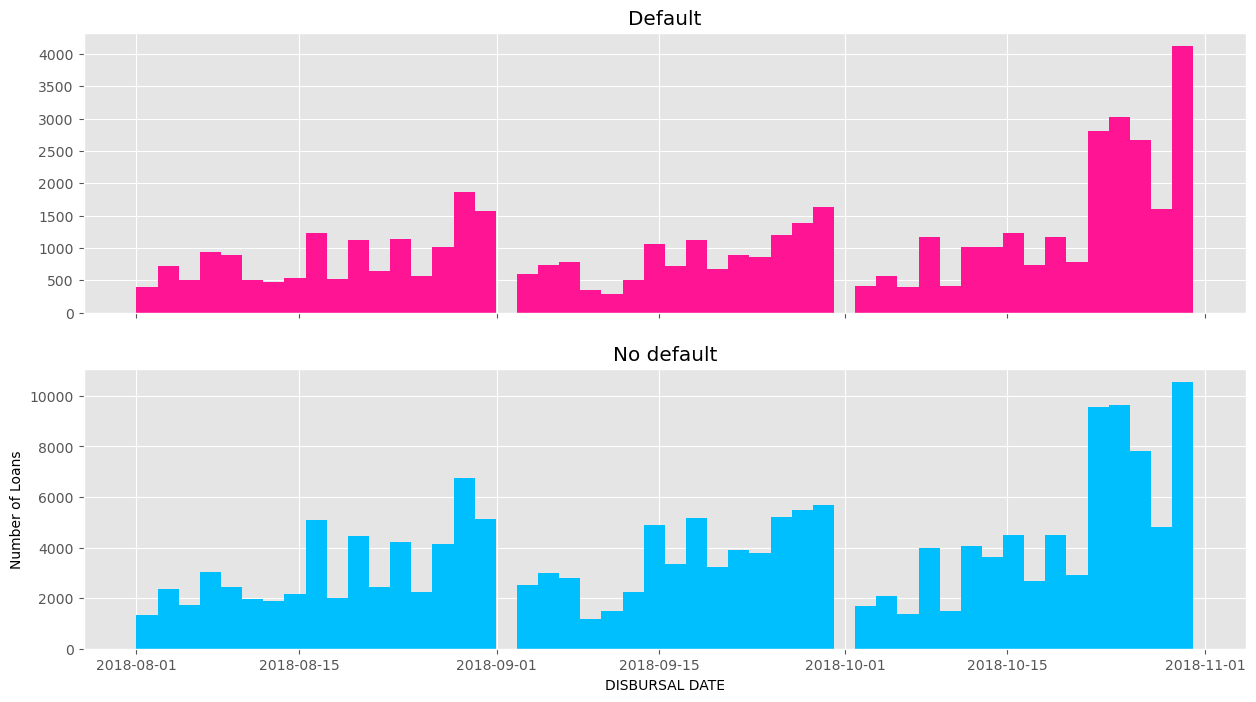

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 1], bins = bins, color = 'deeppink')
ax1.set_title('Default')
ax1.set_title('Default')

ax2.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('No default')

plt.xlabel('DISBURSAL DATE')
plt.ylabel('Number of Loans')
plt.show()

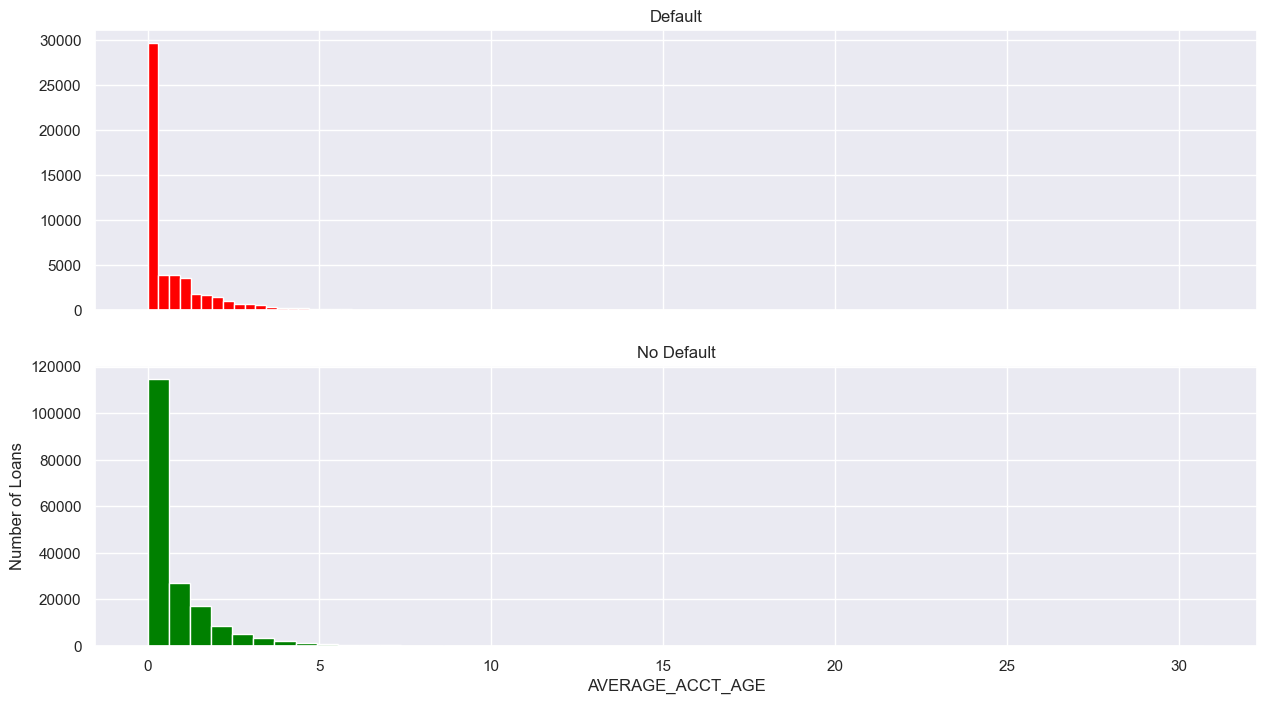

In [163]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.AVERAGE_ACCT_AGE[train.LOAN_DEFAULT == 1], bins = bins, color = 'red')
ax1.set_title('Default')

ax2.hist(train.AVERAGE_ACCT_AGE[train.LOAN_DEFAULT == 0], bins = bins, color = 'green')
ax2.set_title('No Default')

plt.xlabel('AVERAGE_ACCT_AGE')
plt.ylabel('Number of Loans')
plt.show()

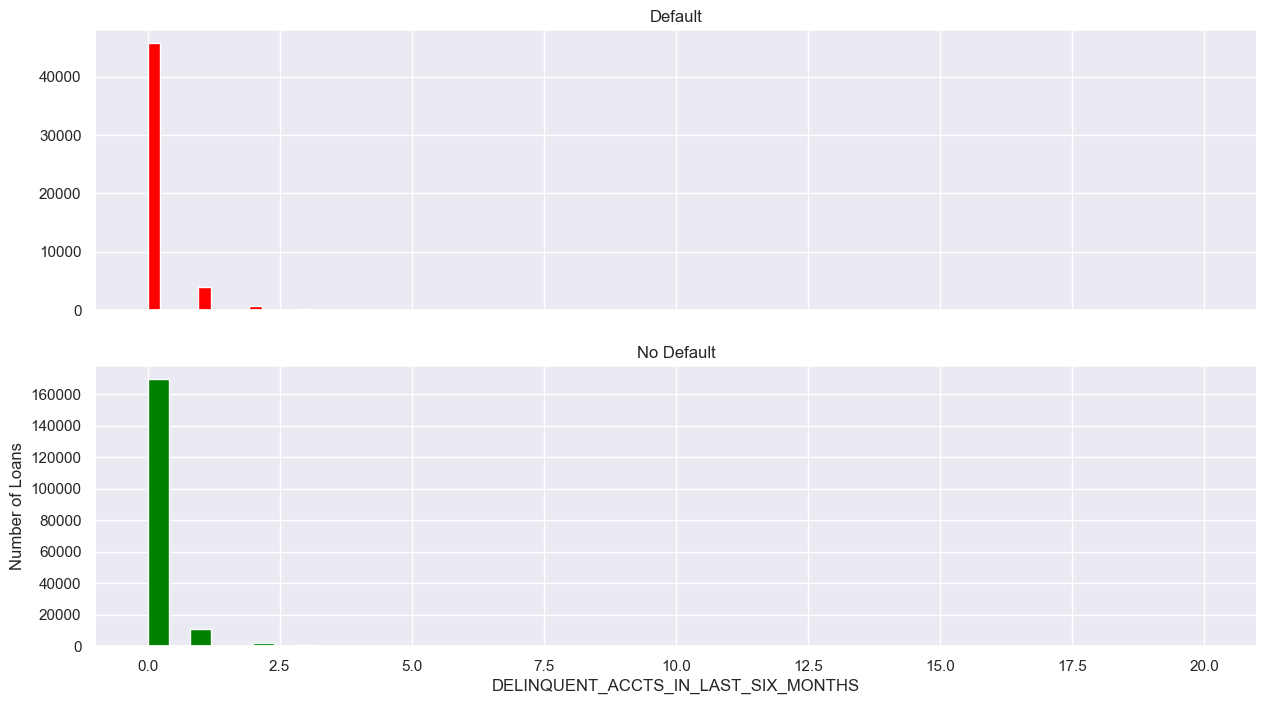

In [164]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[train.LOAN_DEFAULT == 1], bins = bins, color = 'red')
ax1.set_title('Default')

ax2.hist(train.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[train.LOAN_DEFAULT == 0], bins = bins, color = 'green')
ax2.set_title('No Default')

plt.xlabel('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')
plt.ylabel('Number of Loans')
plt.show()

## 3.3 Univariate analysis


In [20]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = train.loc[train['LOAN_DEFAULT'] != 0]
    t0 = train.loc[train['LOAN_DEFAULT'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="LOAN_DEFAULT = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="LOAN_DEFAULT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [21]:
def plot_bar_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(train[feature])
        sns.countplot(train[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();
    

In [22]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()


In [23]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train);

### Let's look into variables with high importance
### Loan information

###  'DISBURSED_AMOUNT' : Amount of Loan disbursed

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


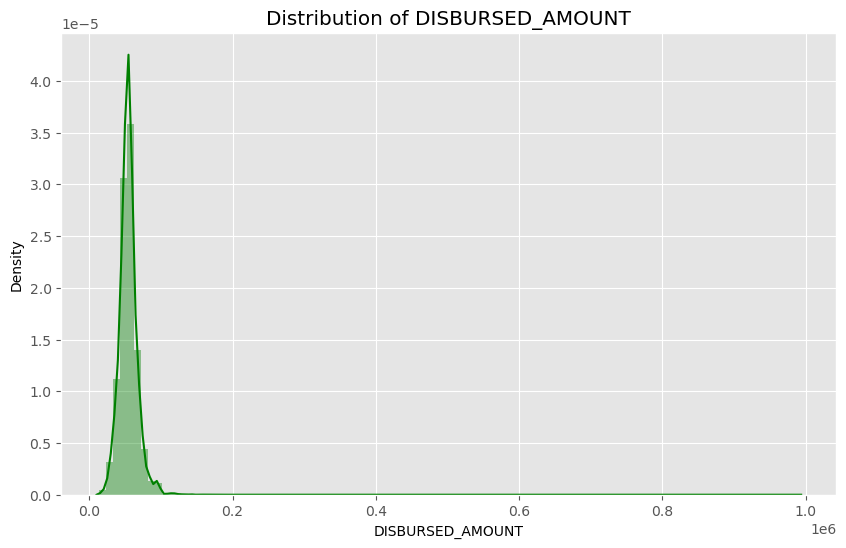

In [24]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','green')


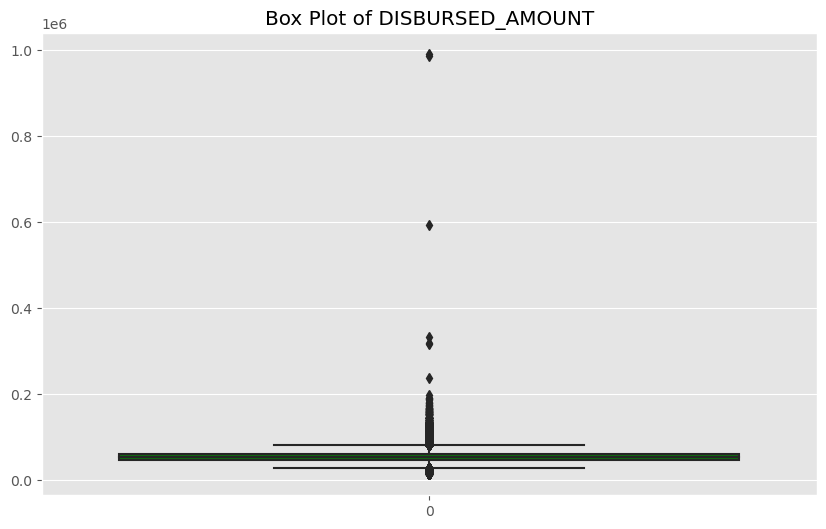

In [25]:
plot_box("DISBURSED_AMOUNT", "green")

#### Since there are outliers - either we can treat outliers or do the binning
#### Here, we have the liberty of performing both and comparing their results

## 3.4 Outlier Treatment


In [26]:
#Number of observations in column
obs = len(train.DISBURSED_AMOUNT)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.DISBURSED_AMOUNT), std(train.DISBURSED_AMOUNT)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.DISBURSED_AMOUNT if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076


In [27]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)
train["DISBURSED_AMOUNT_new"]= train["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))

No. of observations in column:  233154


### Binning
#### mean      54356.993528
#### std       12971.314171
#### min       13320.000000
#### 25%       47145.000000
#### 50%       53803.000000
#### 75%       60413.000000
#### max      990572.000000

In [28]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['DISBURSED_AMOUNT_bins'] = pd.qcut(train['DISBURSED_AMOUNT'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['DISBURSED_AMOUNT_bins'].value_counts()


Medium     58676
Low        58537
Extreme    58207
High       57734
Name: DISBURSED_AMOUNT_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

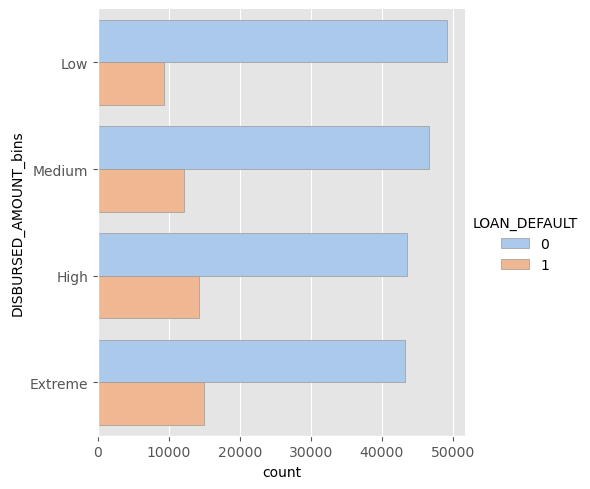

In [29]:
plot_bar("DISBURSED_AMOUNT_bins")

### 'ASSET_COST' : Payment default in the first EMI on due date

count             233154.0
mean     75865.06814380195
std      18944.78128866517
min                37000.0
25%                65717.0
50%                70946.0
75%               79201.75
max              1628992.0
Name: ASSET_COST, dtype: object


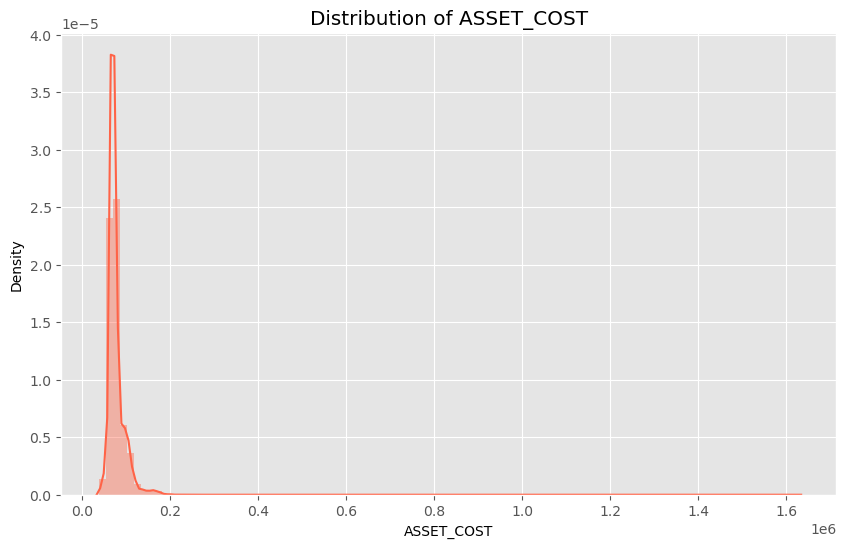

In [30]:
print(train.ASSET_COST.describe().astype(str))
plot_distribution('ASSET_COST','tomato')

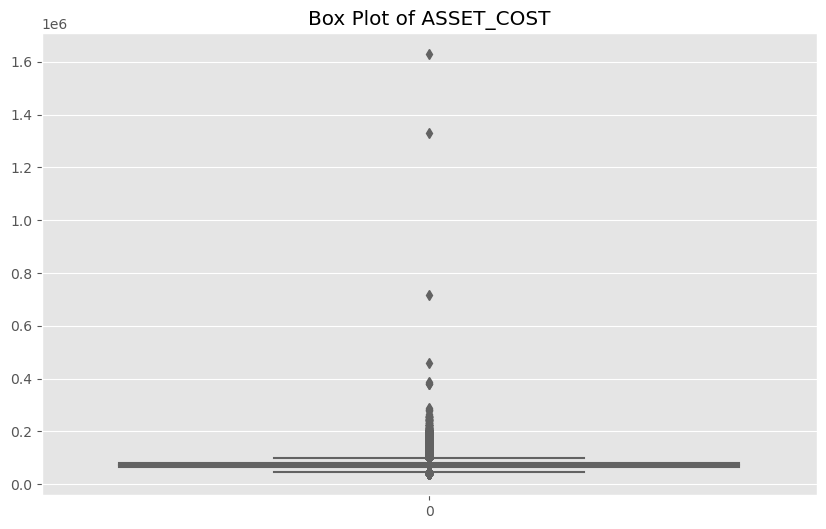

In [31]:
plot_box("ASSET_COST", "tomato")

In [32]:
#Number of observations in column
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(df[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

    


In [33]:
outlier_data(train,"ASSET_COST")

No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425


In [34]:
train["ASSET_COST_new"]= train["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))
outlier_data(train,"ASSET_COST_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=68018.188, Std dev=9598.448
Identified outliers: 60


### Binning
#### mean     75865.06814380195
#### std      18944.78128866517
#### min                37000.0
#### 25%                65717.0
#### 50%                70946.0
#### 75%               79201.75
#### max              1628992.0

In [35]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['ASSET_COST_bins'] = pd.qcut(train['ASSET_COST'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['ASSET_COST_bins'].value_counts()

Low        58290
Extreme    58289
Medium     58288
High       58287
Name: ASSET_COST_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

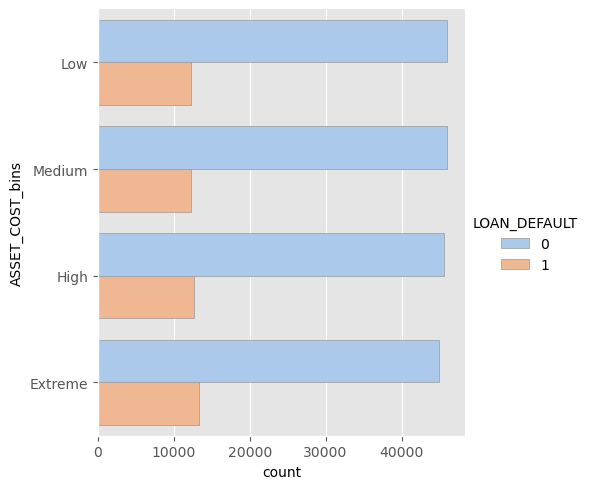

In [36]:
plot_bar("ASSET_COST_bins")

### LTV

count              233154.0
mean      74.74653001878589
std      11.456635738792304
min                   10.03
25%                   68.88
50%                    76.8
75%                   83.67
max                    95.0
Name: LTV, dtype: object


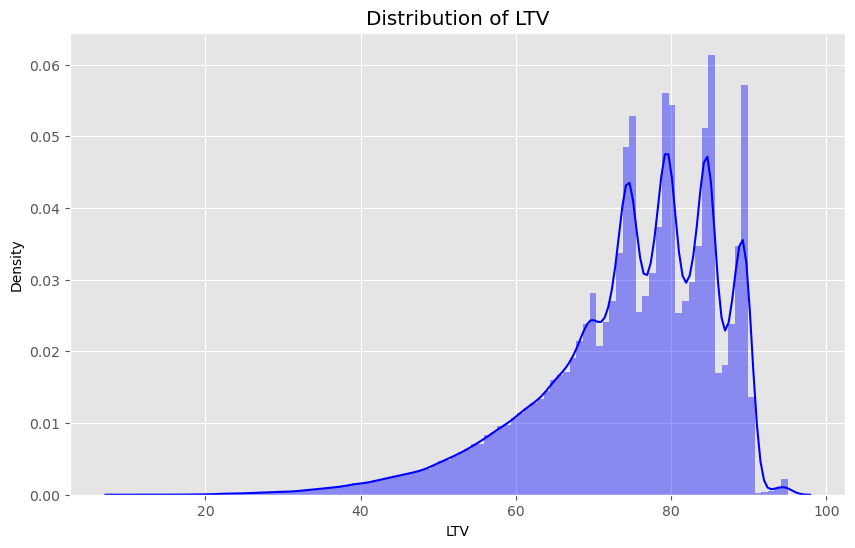

In [37]:
print(train.LTV.describe().astype(str))
plot_distribution('LTV','blue')


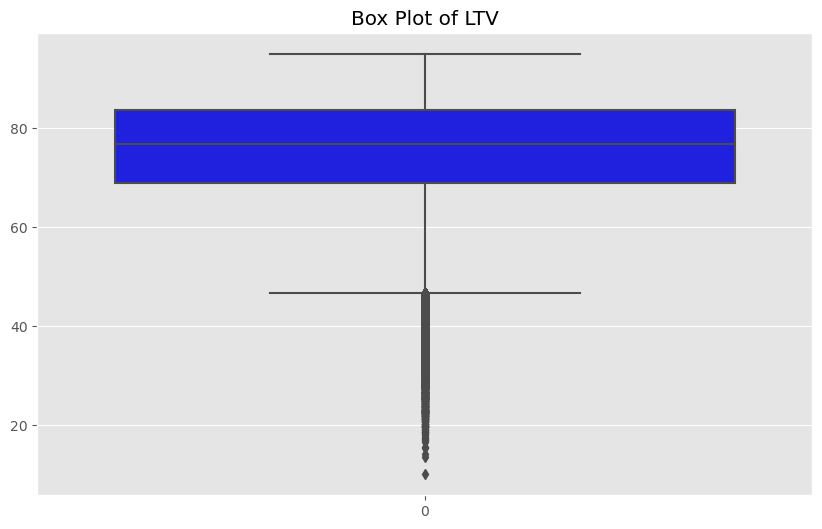

In [38]:

plot_box("LTV", "blue")


In [39]:
outlier_data(train,"LTV")

No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745


In [40]:
train["LTV_new"]= train["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(train.LTV_new))
outlier_data(train,"LTV_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


### Binning
#### mean      74.74653001879038
#### std      11.456635738792304
#### min                   10.03
#### 25%                   68.88
#### 50%                    76.8
#### 75%                   83.67
#### max                    95.0

In [41]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['LTV_bins'] = pd.qcut(train['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['LTV_bins'].value_counts()


Low        58303
Medium     58299
High       58285
Extreme    58267
Name: LTV_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

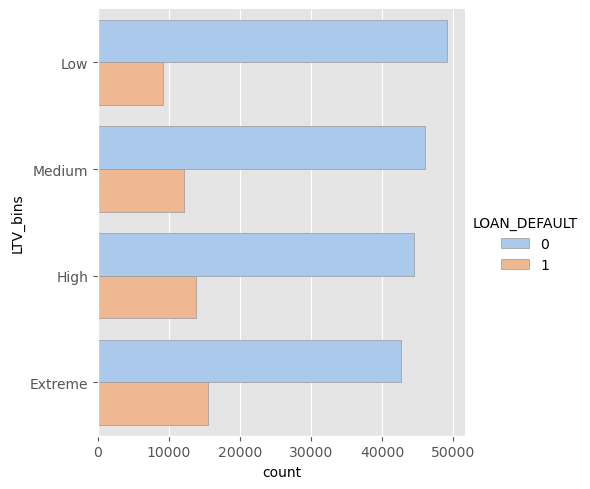

In [42]:
plot_bar("LTV_bins")


### 'PERFORM_CNS_SCORE': Bureau Score


count              233154.0
mean     289.46299441570807
std       338.3747790080087
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


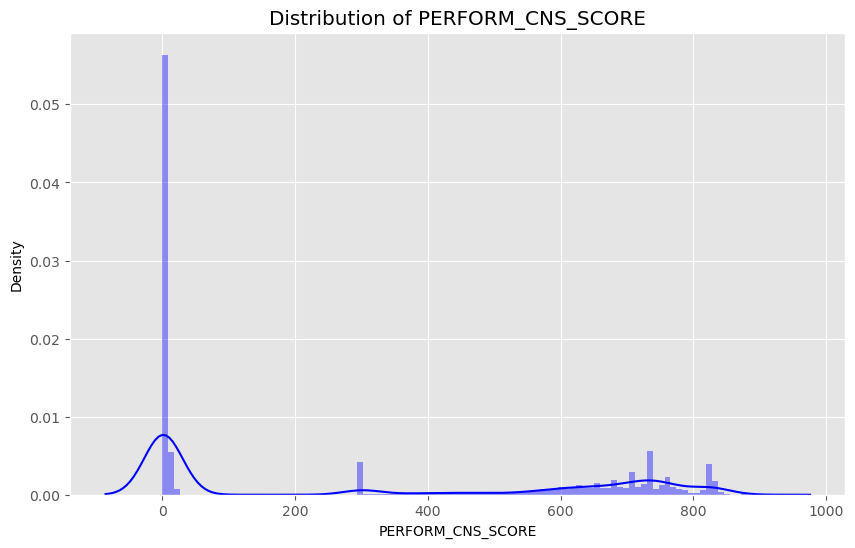

In [43]:
print(train.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','blue')


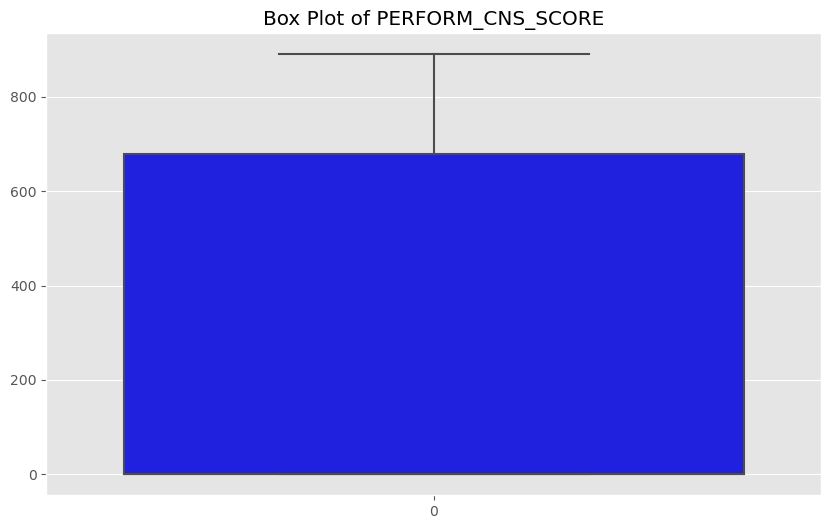

In [44]:
plot_box("PERFORM_CNS_SCORE", "blue")

In [45]:
outlier_data(train,"PERFORM_CNS_SCORE")

No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0


In [46]:

bin_labels = ["No History",'Very Low', "Low" ,'Medium', 'High']
cut_bins = [-1,10,150, 350, 650, 1000]

train['PERFORM_CNS_SCORE_bins'] = pd.cut(train['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PERFORM_CNS_SCORE_bins'].value_counts()


No History    116950
High           65034
Medium         28425
Very Low       12835
Low             9910
Name: PERFORM_CNS_SCORE_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

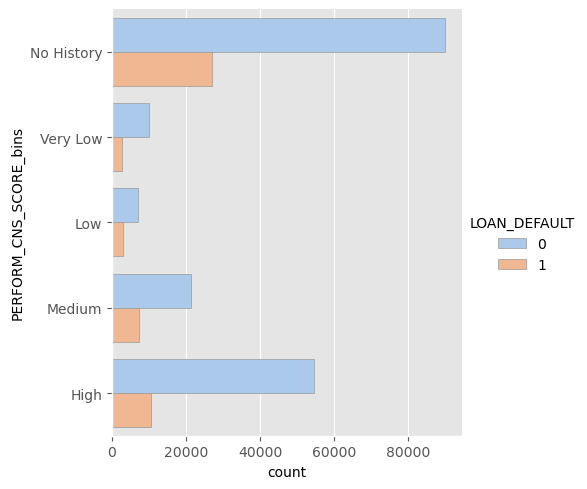

In [47]:
plot_bar("PERFORM_CNS_SCORE_bins")

In [48]:
train.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          High                       14124
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
B-Very Low Risk                                          High                        9201
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
C-Very Low Risk     

### PERFORM_CNS_SCORE_DESCRIPTION

In [49]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [50]:
g = train.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
gg = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (gg)

#train.groupby("PERFORM_CNS_SCORE_DESCRIPTION").LOAN_DEFAULT.value_counts(normalize=False)

                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0              11783   83.425375
                                                   1               2341   16.574625
B-Very Low Risk                                    0               7993   86.870992
                                                   1               1208   13.129008
C-Very Low Risk                                    0              13275   82.736055
                                                   1               2770   17.263945
D-Very Low Risk                                    0               9659   85.041381
                                                   1               1699   14.958619
E-Low Risk                                         0               4821   82.820821
                                                   1               1000   17

### PRI_NO_OF_ACCTS : count of total loans taken by the customer at the time of disbursement


count              233154.0
mean     2.4406358029456925
std       5.217233021576896
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


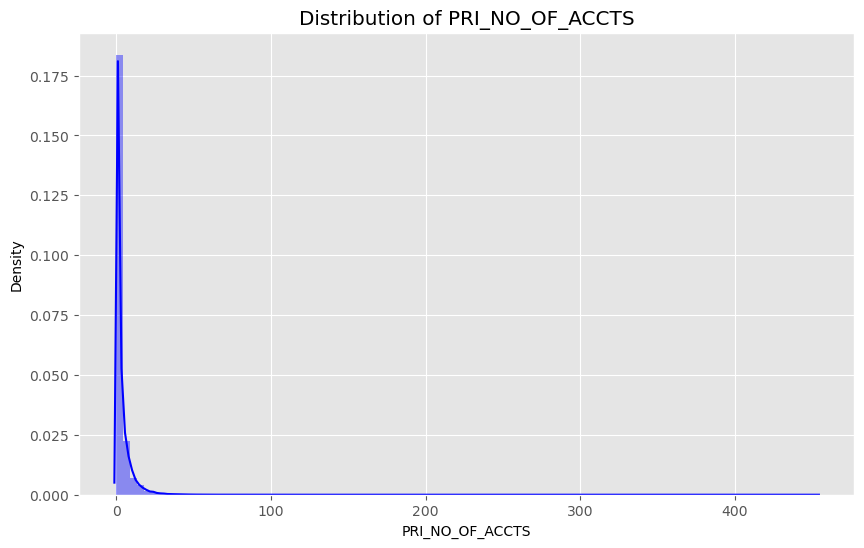

In [51]:
print(train.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')


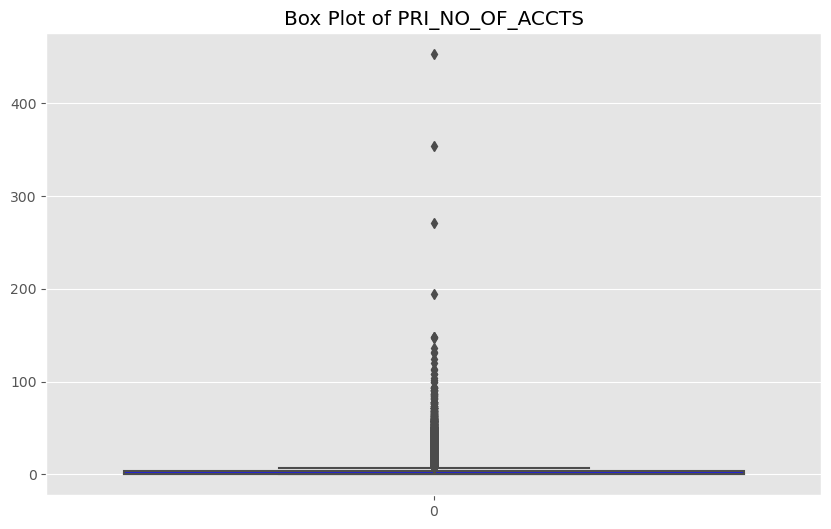

In [52]:
plot_box("PRI_NO_OF_ACCTS", "blue")

In [53]:
outlier_data(train,"PRI_NO_OF_ACCTS")

No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119


In [54]:
train["PRI_NO_OF_ACCTS_new"]= train["PRI_NO_OF_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_NO_OF_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [55]:

bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

train['PRI_NO_OF_ACCTS_bins'] = pd.cut(train['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_NO_OF_ACCTS_bins'].value_counts()

One              151928
More than One     81226
Name: PRI_NO_OF_ACCTS_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

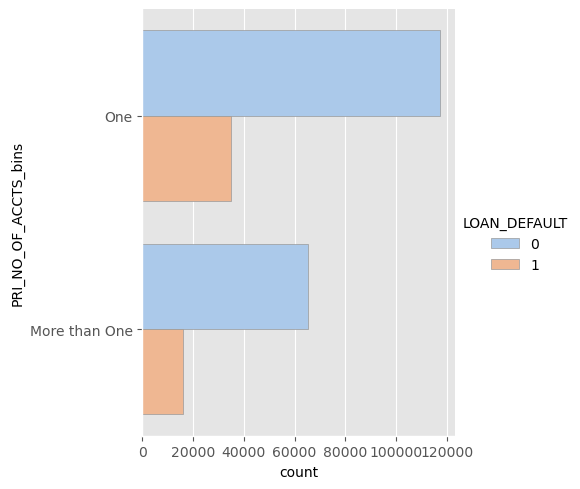

In [56]:
plot_bar("PRI_NO_OF_ACCTS_bins")

### PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement


count               233154.0
mean     0.15654889043293274
std       0.5487867498784913
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                     25.0
Name: PRI_OVERDUE_ACCTS, dtype: object


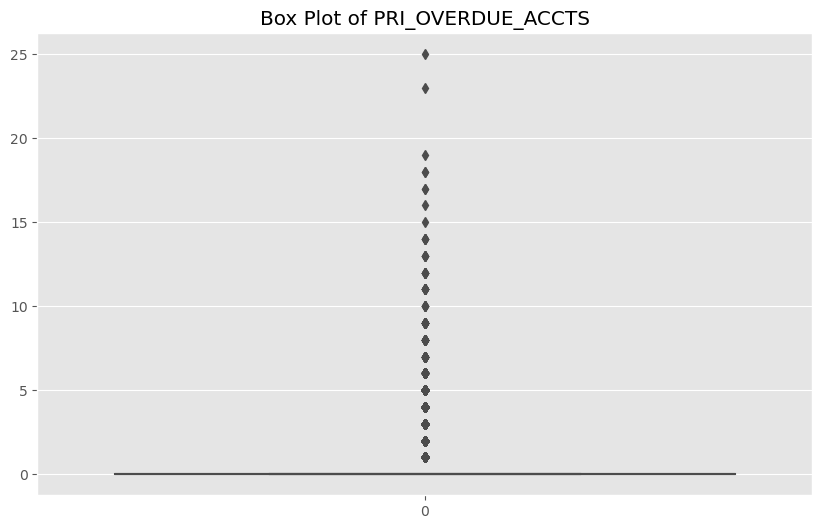

In [57]:
print(train.PRI_OVERDUE_ACCTS.describe().astype(str))
plot_box("PRI_OVERDUE_ACCTS", "blue")

In [58]:
outlier_data(train,"PRI_OVERDUE_ACCTS")


No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.549
Identified outliers: 6305


In [59]:
train["PRI_OVERDUE_ACCTS_new"]= train["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_OVERDUE_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [60]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

train['PRI_OVERDUE_ACCTS_bins'] = pd.cut(train['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_OVERDUE_ACCTS_bins'].value_counts()

None             206879
One (or more)     26275
Name: PRI_OVERDUE_ACCTS_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

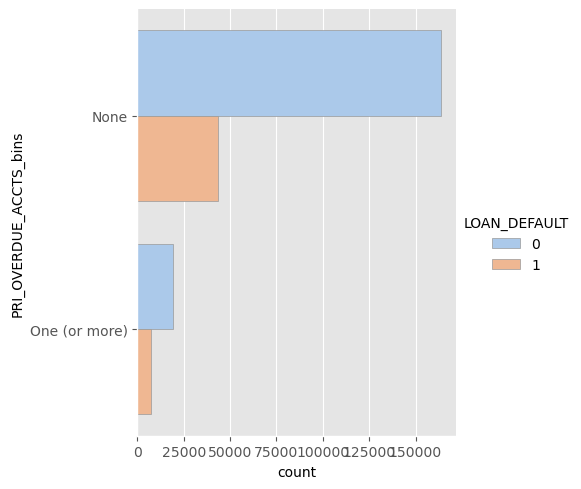

In [61]:
plot_bar("PRI_OVERDUE_ACCTS_bins")

## Let's look into data with lesser importance
#### MOBILENO_AVL_FLAG : if Mobile no. was shared by the customer then flagged as 1
#### AADHAR_FLAG : if aadhar was shared by the customer then flagged as 1
#### PAN_FLAG : if pan was shared by the customer then flagged as 1
#### VOTERID_FLAG : if voter  was shared by the customer then flagged as 1
#### PASSPORT_FLAG : if DL was shared by the customer then flagged as 1
#### DRIVING_FLAG : if passport was shared by the customer then flagged as 1

<Figure size 640x480 with 0 Axes>

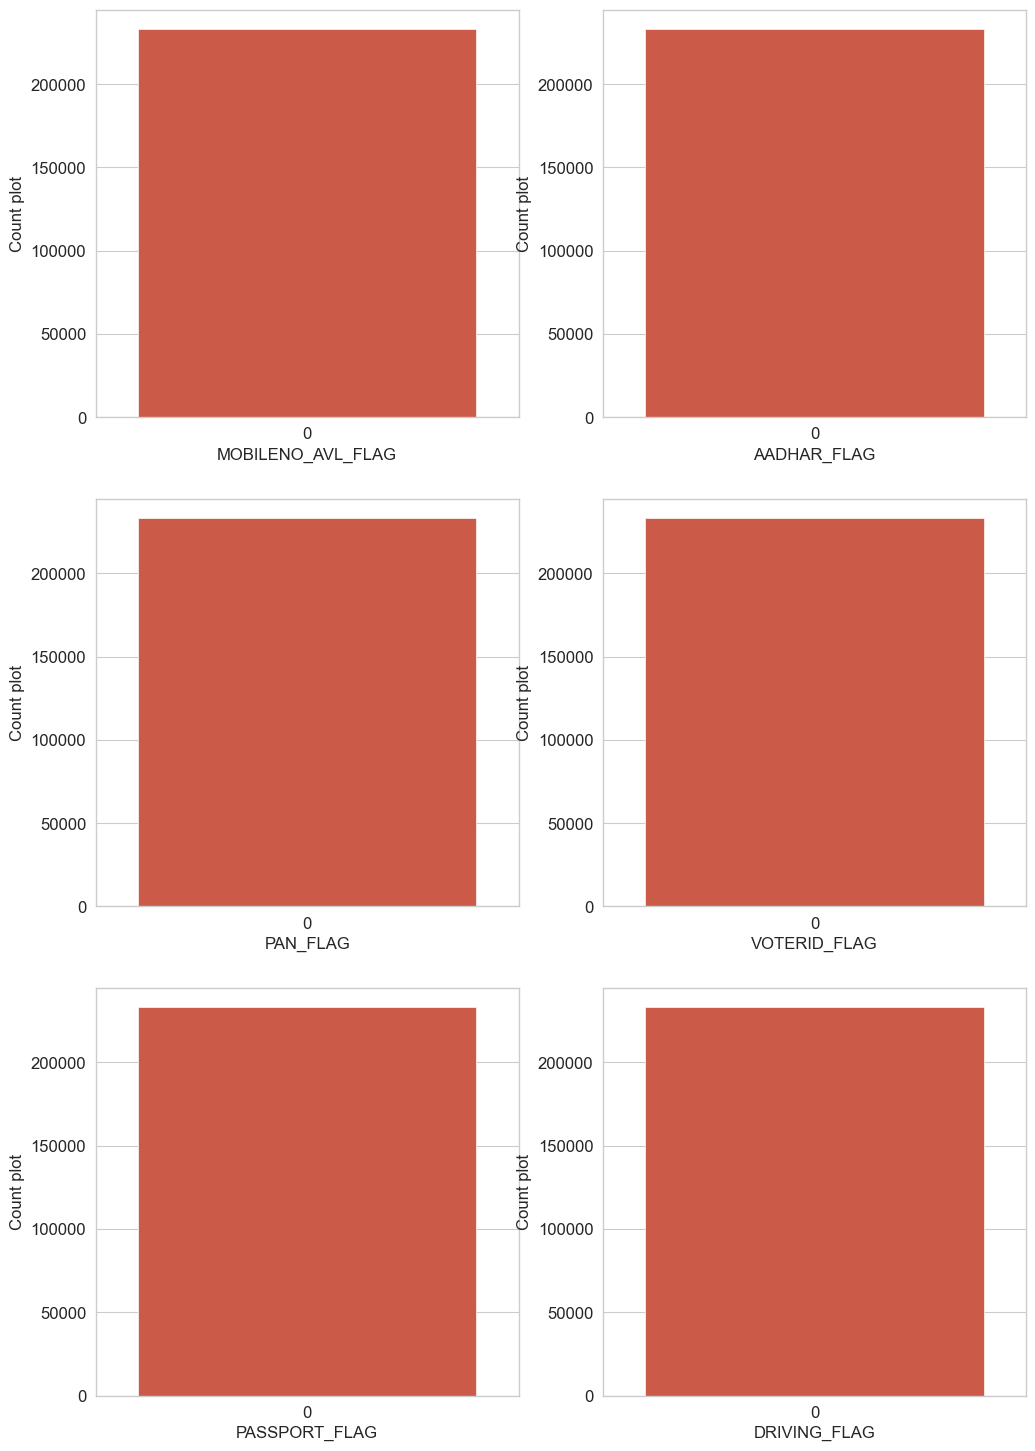

In [62]:
var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
plot_bar_comp(var,nrow=3)

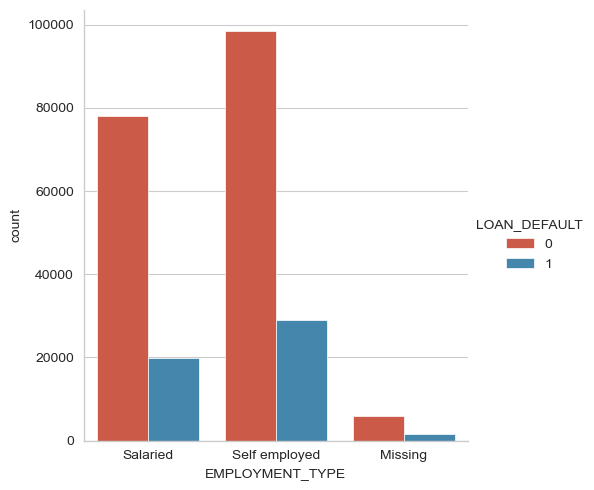

In [63]:
# Employment Type
sns.catplot(data=train,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

## Age is in days

In [64]:
now = pd.Timestamp('now')
#train['DATE_OF_BIRTH'] = train['DATE_OF_BIRTH'].where(train['DATE_OF_BIRTH'] < now, train['DATE_OF_BIRTH'] -  np.timedelta64(100, 'Y'))   
train['age'] = (now - train['DATE_OF_BIRTH'])  

train['age']= train['age'].astype(str)
train[['age','age_waste']] = train['age'].str.split("days",expand=True)
train['age']= train['age'].astype(str).astype(int)
train= train.drop(columns= ['age_waste'])

print(train['age'].head())

0    14466
1    13889
2    13865
3    10815
4    16680
Name: age, dtype: int32


In [65]:
train['disbursal_time'] = (now - train['DISBURSAL_DATE'])  

train['disbursal_time']= train['disbursal_time'].astype(str)
train[['disbursal_time','disbursal_time_waste']] = train['disbursal_time'].str.split("days",expand=True)
train['disbursal_time']= train['disbursal_time'].astype(str).astype(int)
train= train.drop(columns= ['disbursal_time_waste'])

print(train['disbursal_time'].head())

0    1833
1    1779
2    1835
3    1749
4    1779
Name: disbursal_time, dtype: int32


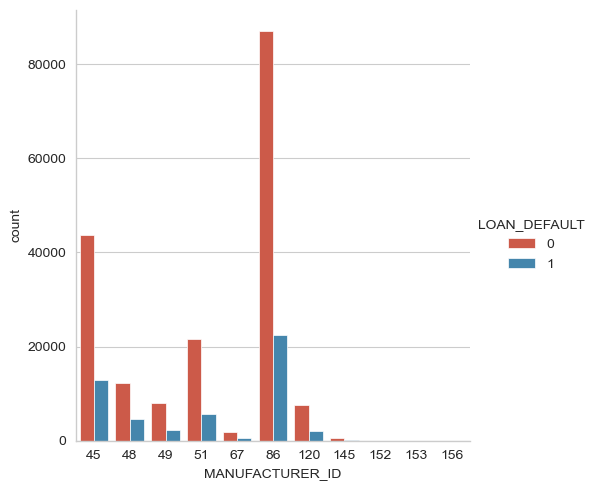

In [66]:
# MANUFACTURER_ID
sns.catplot(data=train,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

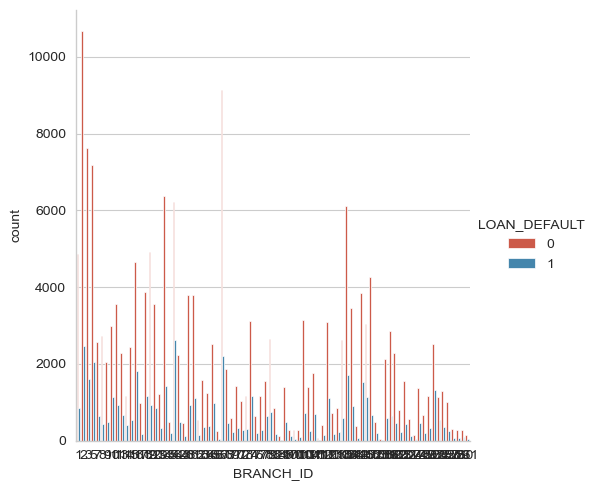

In [67]:
sns.catplot(data=train,kind='count',x='BRANCH_ID',hue='LOAN_DEFAULT')

#### Let's see the new columns along with the less important continous variables

<Figure size 640x480 with 0 Axes>

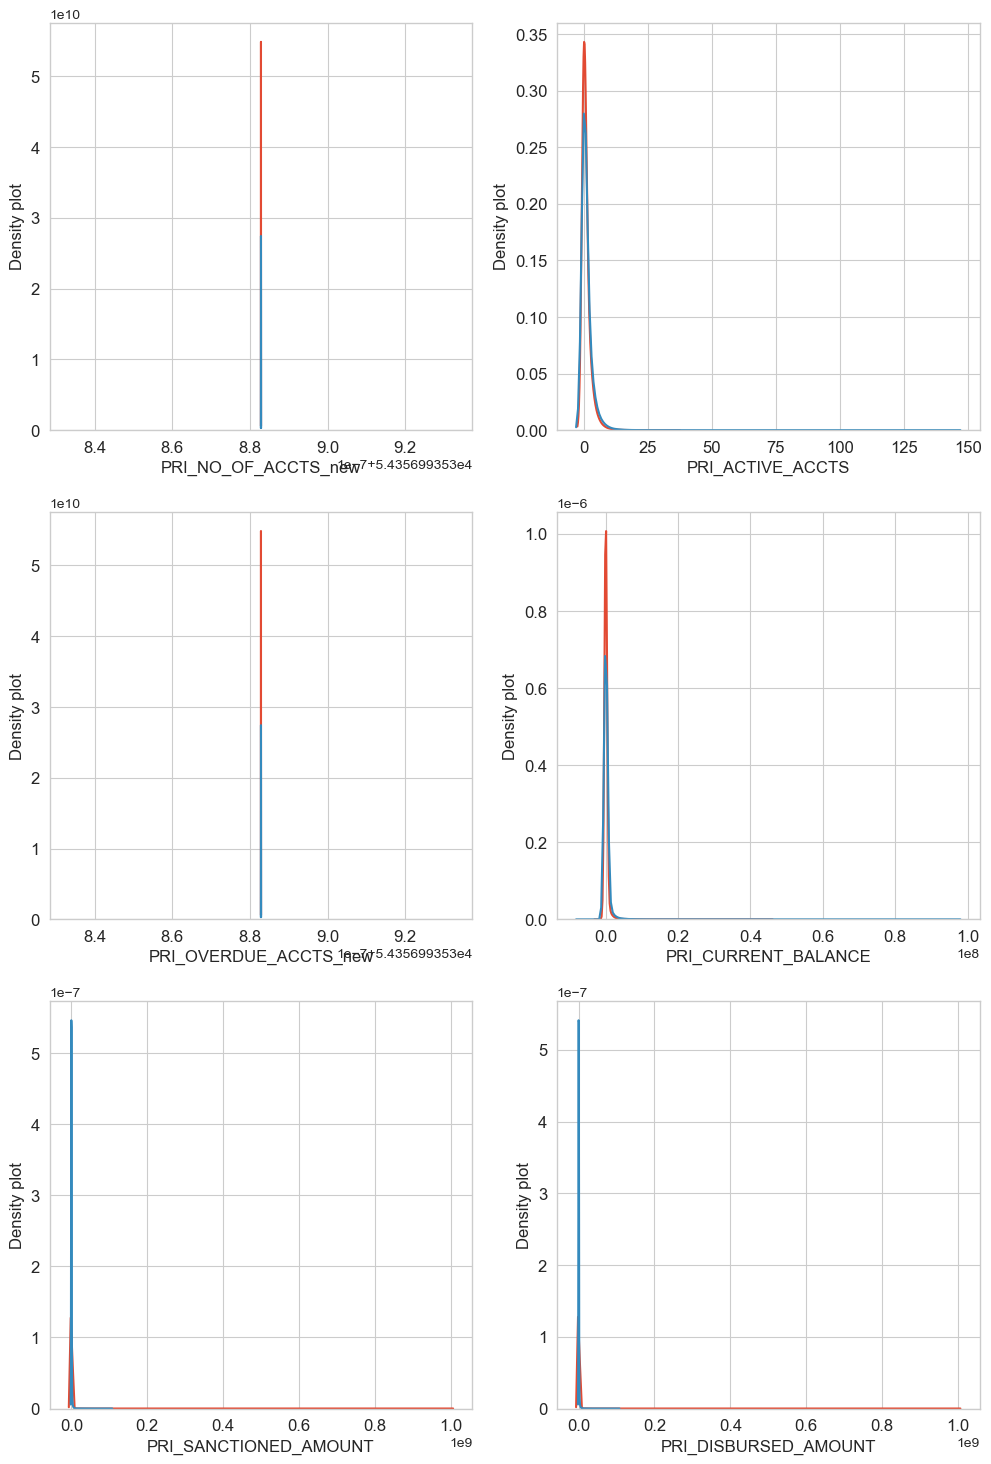

In [68]:
var = ['PRI_NO_OF_ACCTS_new', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS_new', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

<Figure size 640x480 with 0 Axes>

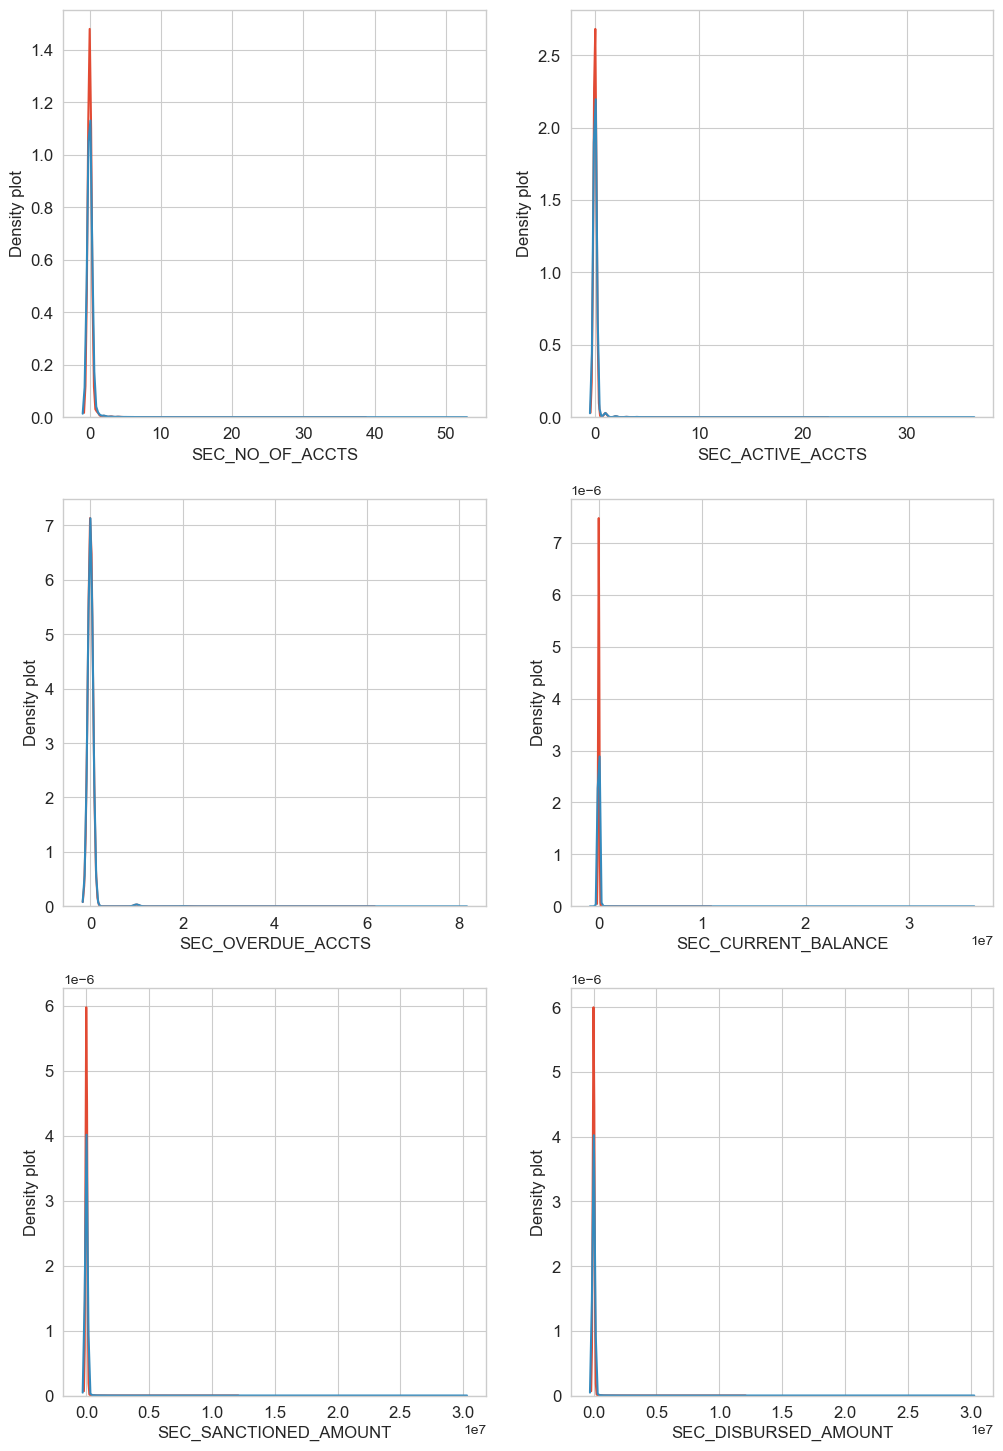

In [69]:
var = ['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

## 3.5 Feature Selection


In [70]:
#Useless features
#train = train.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
train = train.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

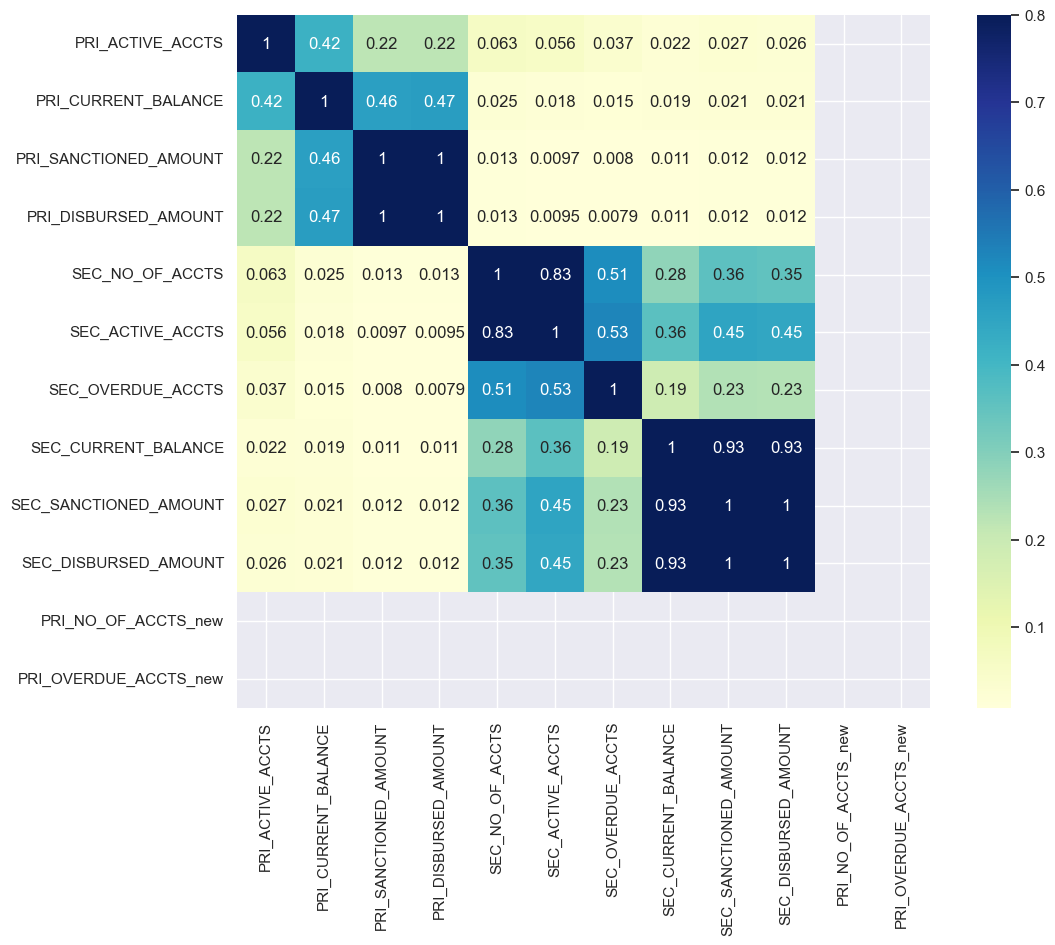

In [71]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT',  'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');


#### Not highly correlated with anyone: 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_OVERDUE_ACCTS'
#### 'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new'are perfectly positively correlated and hence keeping one 
#### 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS' are highly positively correlated, hence keeping one
####  'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' are highly positively correlated, hence keeping one



In [72]:
# train = train.drop(['PRI_OVERDUE_ACCTS_new','SEC_ACTIVE_ACCTS','SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' ],axis=1)

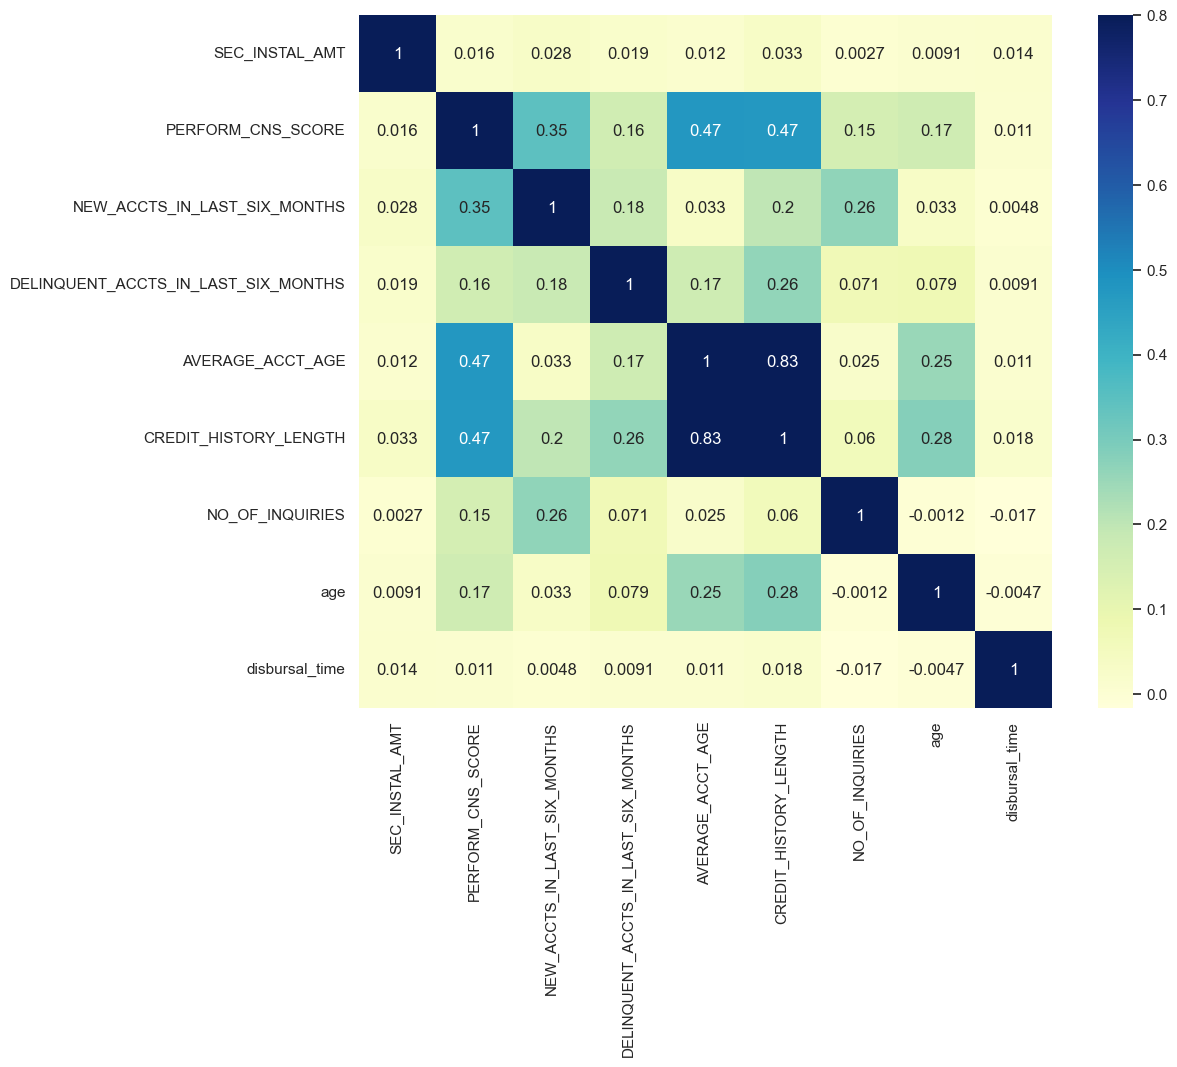

In [73]:
#Highly Correlated
sns.set()

cols = train[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

#### 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'are highly positively correlated and hence keeping one

In [74]:
#train = train.drop(['AVERAGE_ACCT_AGE' ],axis=1)

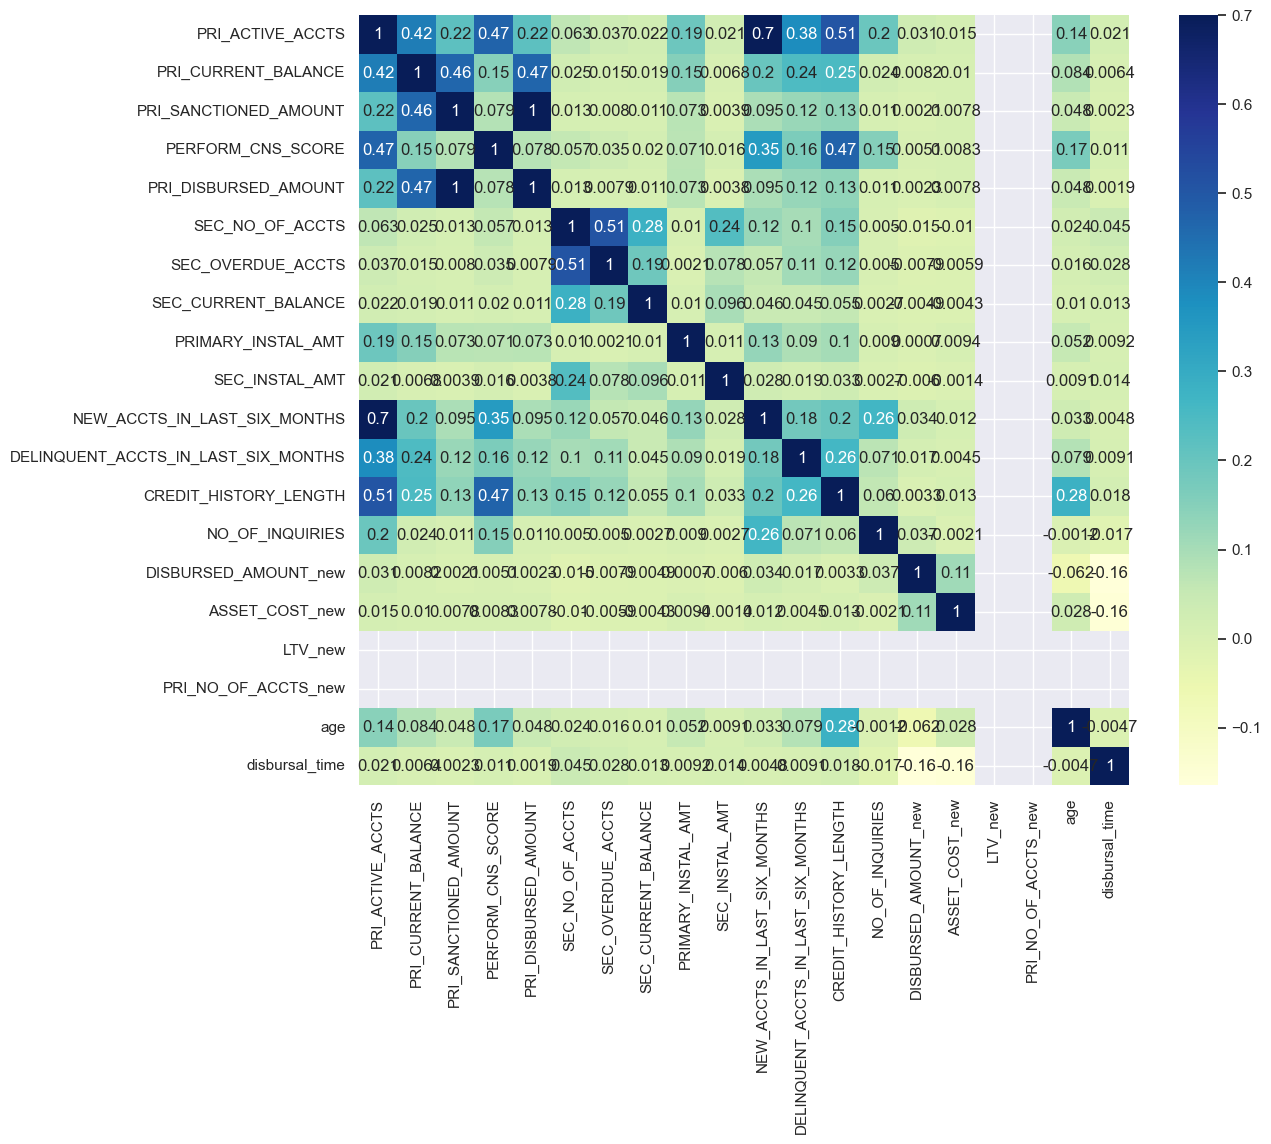

In [75]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','LTV_new','PRI_NO_OF_ACCTS_new','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

#### One out of 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT' 
#### One out of 'LTV_new', 'PRI_NO_OF_ACCTS_new'
#### Eliminate 'NEW_ACCTS_IN_LAST_SIX_MONTHS'

In [76]:
#train = train.drop(['PRI_SANCTIONED_AMOUNT','PRI_NO_OF_ACCTS_new','NEW_ACCTS_IN_LAST_SIX_MONTHS'],axis=1)

### Preparing Datasets 1) Binned Variables 2) Continous variables

In [77]:
train_con = train[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
                   'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 
                   'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 
                   'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 
                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
                   'LOAN_DEFAULT', 'DISBURSED_AMOUNT_new', 'ASSET_COST_new', 
                   'LTV_new', 'age', 'disbursal_time']]

In [78]:
train_bin = train [['UNIQUEID', 'EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 
                    'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 
                    'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                    'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
                    'DISBURSED_AMOUNT_bins', 'ASSET_COST_bins', 'LTV_bins',
                    'PERFORM_CNS_SCORE_bins', 'PRI_NO_OF_ACCTS_bins', 'PRI_OVERDUE_ACCTS_bins', 'age', 'disbursal_time']]

In [79]:
# Confusion Matrix

def plot_confusion_matrix() :
    sns.heatmap(cm,annot=True,fmt='g',cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

In [89]:
# Precision, Recall, F1 Score
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [80]:
# ROC curve
def plot_roc(y_test, logpred):
    roc_auc = metrics.roc_auc_score(y_test, logpred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, logpred)
    plt.figure()
    
    plt.plot(fpr, tpr, label = 'ROC curve', color ='orange', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## 3.5.1 Standardization of data


In [81]:
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(train_con[col])),columns=[col])

    return df

In [82]:
scaled_df = scaleColumns(train_con,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 
                                 'NO_OF_INQUIRIES', 'DISBURSED_AMOUNT_new',
                                 'ASSET_COST_new', 'LTV_new', 'age', 'disbursal_time'])

scaled_df.head()

,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time
0,Salaried,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-3.637979e-11,0.026250,1.880044
1,Self employed,1,1,0,0,0,0,0.911822,I-Medium Risk,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-3.637979e-11,-0.134554,-0.094516
2,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-3.637979e-11,-0.141243,1.953176
3,Self employed,1,1,0,0,0,0,0.045917,L-Very High Risk,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-3.637979e-11,-0.991244,-1.191493
4,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-3.637979e-11,0.643267,-0.094516


## 3.5.2 Dummy insertion


In [83]:
train_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
train_dummy.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-3.637979e-11,0.026250,1.880044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-3.637979e-11,-0.134554,-0.094516,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-3.637979e-11,-0.141243,1.953176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-3.637979e-11,-0.991244,-1.191493,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-3.637979e-11,0.643267,-0.094516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [84]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [85]:
np.any(np.isnan(X))

False

In [86]:
X = X.fillna(0)
X.shape

(233154, 44)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 4. Base Line Models



## 4.1 Logistic Regression



[[36464    41]
 [10083    43]]
78.0
Precision =     0.512
Recall    =     0.004
F1_score  =     0.008


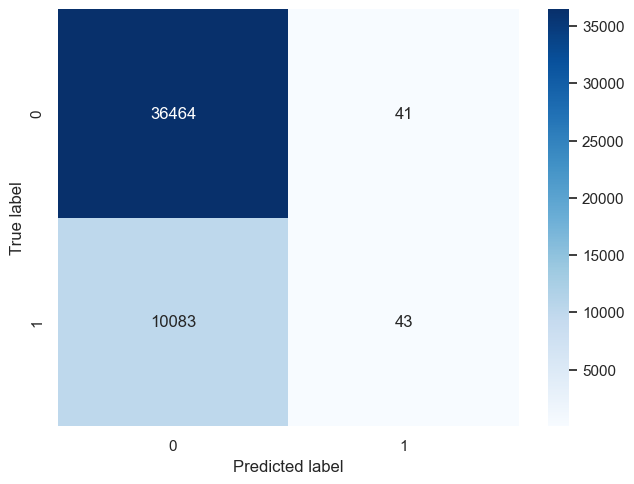

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
cm=metrics.confusion_matrix(y_test, logpred)
show_metrics()

plot_confusion_matrix()


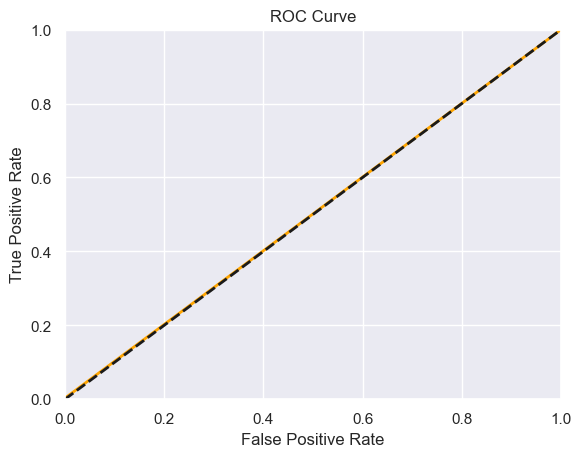

In [91]:
plot_roc(y_test, logpred)


In [92]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("AUC Score ",metrics.roc_auc_score(y_test,logpred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred))

Accuracy of model  0.7828912097102786
F1 Score  0.00842311459353575
Recall Score  0.004246494173414972
AUC Score  0.5015616801780649
Balanced Accuracy Score  0.5015616801780648


Accuracy score is good, however the model is not predicting the Defaults well

## 4.2 Random Forest



In [93]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35109  1396]
 [ 9428   698]]
77.0


Precision =     0.333
Recall    =     0.069
F1_score  =     0.114


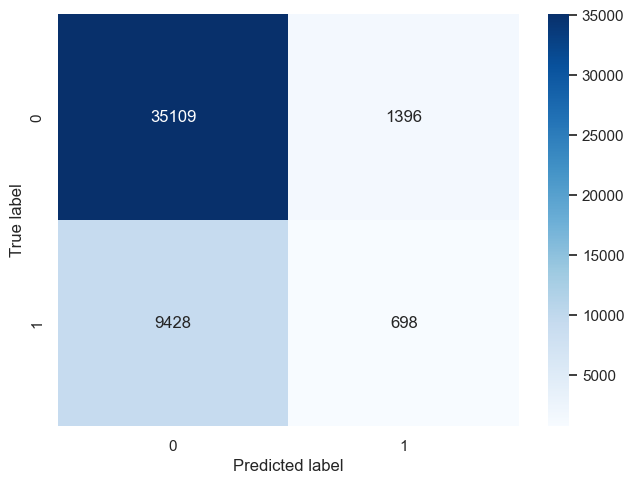

In [94]:
cm=metrics.confusion_matrix(y_test, rfc_pred)
show_metrics()

plot_confusion_matrix()


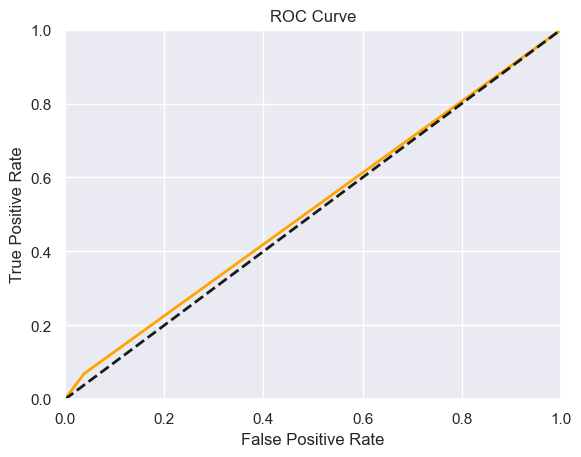

In [95]:
plot_roc(y_test, rfc_pred)


In [96]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

Accuracy of model  0.7678797366558727
F1 Score  0.11423895253682488
Recall Score  0.06893146355915465
AUC Score  0.5153450633779886
Balanced Accuracy Score  0.5153450633779885


Accuracy score is good, however the model is predicting the Defaults better than Logistic reg


## 4.3 Naive Bayes



In [97]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 6915 29590]
 [ 1178  8948]]
34.0


Precision =     0.232
Recall    =     0.884
F1_score  =     0.368


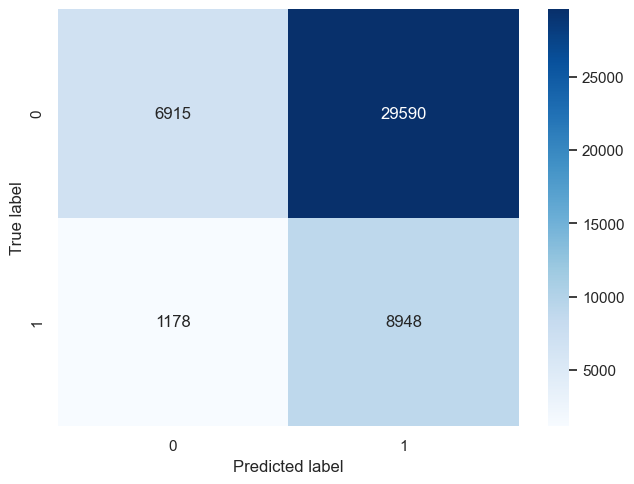

In [98]:
cm=metrics.confusion_matrix(y_test, nb_pred)
show_metrics()

plot_confusion_matrix()


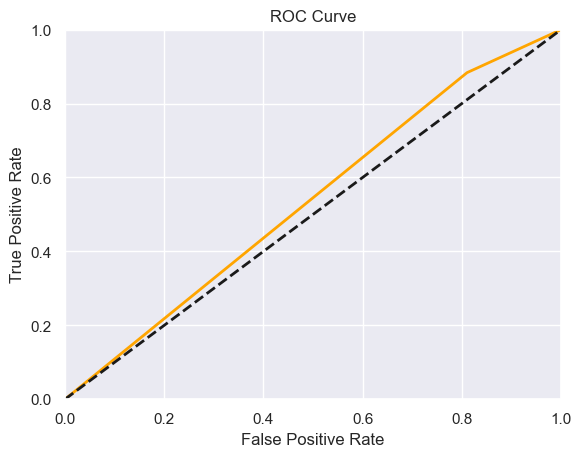

In [99]:
plot_roc(y_test, nb_pred)

In [100]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.34018142437434323
F1 Score  0.36774617787276015
Recall Score  0.8836658107841201
AUC Score  0.5365459583984975
Balanced Accuracy Score  0.5365459583984975


Model accuracy is very poor

## 4.4 Stochastic Gradient Descent



In [101]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36480    25]
 [10112    14]]
78.0


Precision =     0.359
Recall    =     0.001
F1_score  =     0.003


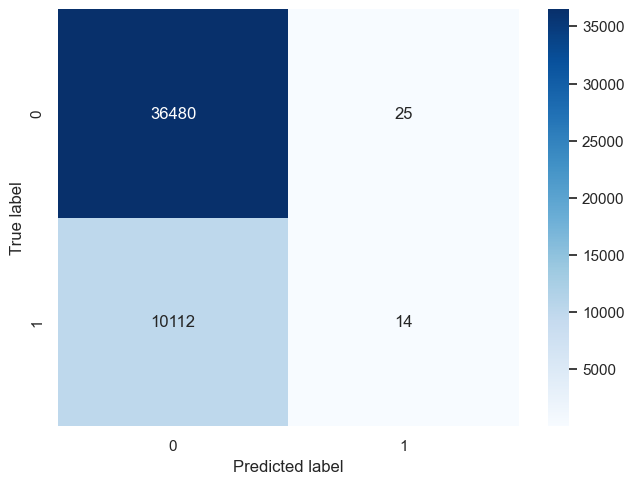

In [102]:
cm=metrics.confusion_matrix(y_test, sgd_pred)
show_metrics()

plot_confusion_matrix()


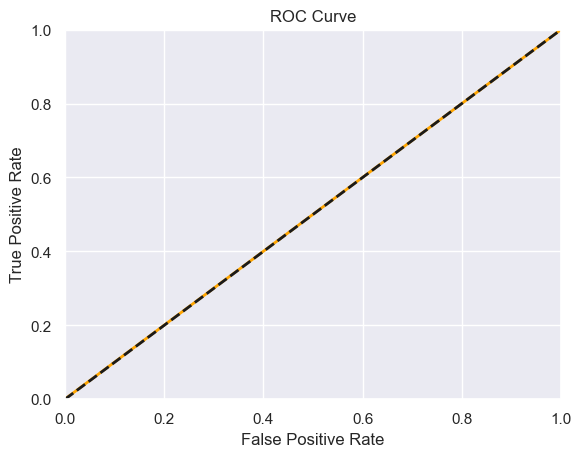

In [103]:
plot_roc(y_test, sgd_pred)

In [104]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7826124252106967
F1 Score  0.002754549926217413
Recall Score  0.0013825794983211535
AUC Score  0.5003488709024272
Balanced Accuracy Score  0.5003488709024273


Accuracy score is good, however the model is not predicting the Defaults well

## 4.5 Decision Tree Classifier



In [105]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


Precision =     0.357
Recall    =     0.017
F1_score  =     0.033


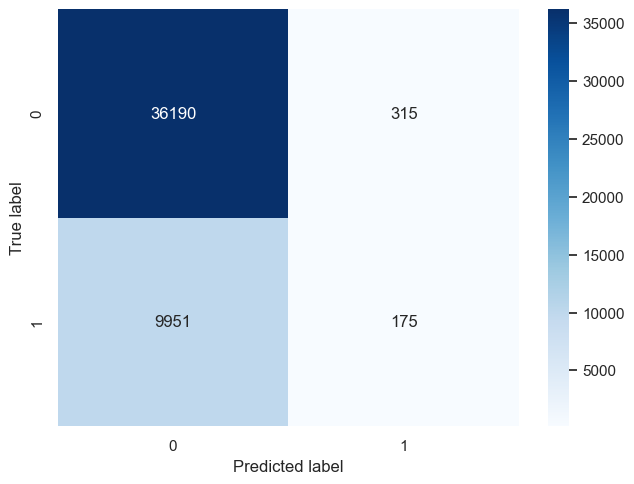

In [106]:
cm=metrics.confusion_matrix(y_test, dtree_pred)
show_metrics()

plot_confusion_matrix()

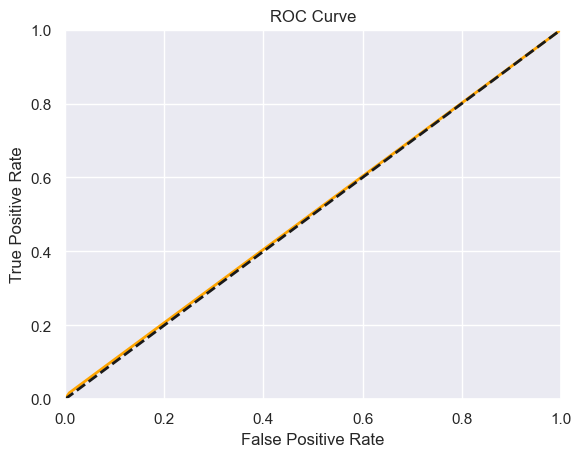

In [107]:
plot_roc(y_test, dtree_pred)

In [108]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.7798460251763848
F1 Score  0.03296910324039186
Recall Score  0.017282243729014417
AUC Score  0.5043266443956673
Balanced Accuracy Score  0.5043266443956673


Accuracy score is good, however the model is not predicting the Defaults well

## Best model is Random Forest till now

## 5. Dealing with Imbalanced data



## 5.1 SMOTE



SMOTE or Synthetic Minority Oversampling Technique is used to create synthetic data. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [109]:
from imblearn.over_sampling import SMOTE


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [110]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[26109 19636]
 [ 5673  6871]]
56.99999999999999


Precision =     0.259
Recall    =     0.548
F1_score  =     0.352


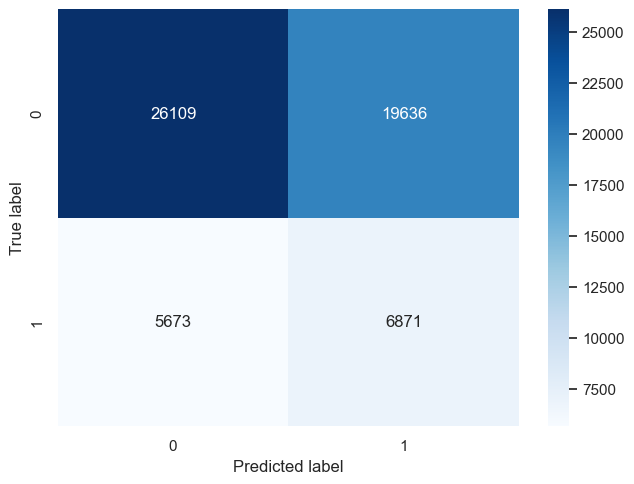

In [111]:
cm=metrics.confusion_matrix(y_test, sgd_pred)
show_metrics()

plot_confusion_matrix()

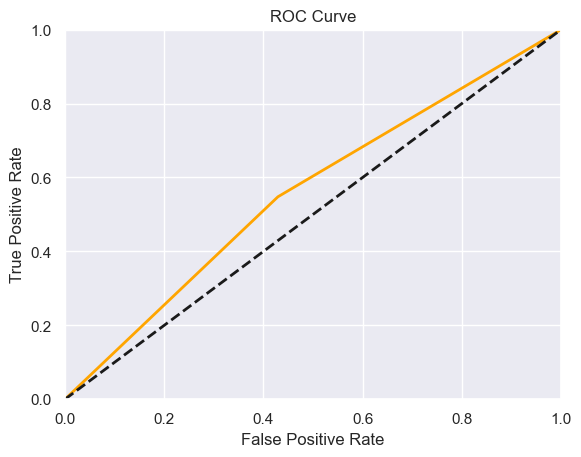

In [112]:
plot_roc(y_test, sgd_pred)

In [113]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[25128 20617]
 [ 5258  7286]]
56.00000000000001


Precision =     0.261
Recall    =     0.581
F1_score  =     0.360


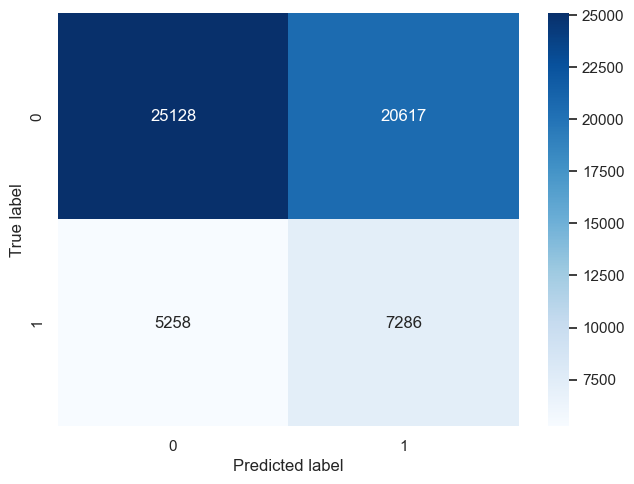

In [114]:
cm=metrics.confusion_matrix(y_test, dtree_pred)
show_metrics()

plot_confusion_matrix()

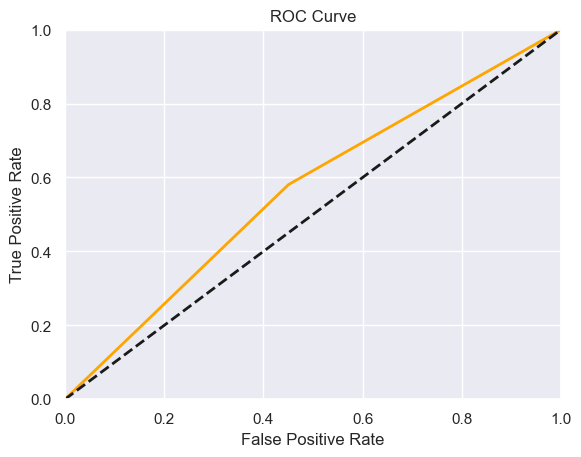

In [115]:
plot_roc(y_test, dtree_pred)

In [116]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [117]:
from sklearn.datasets import make_classification
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1295 ± 0.0031,DISBURSED_AMOUNT_new
0.1172 ± 0.0015,disbursal_time
0.1014 ± 0.0011,ASSET_COST_new
0.1012 ± 0.0013,age
0.0652 ± 0.0010,PERFORM_CNS_SCORE
0.0587 ± 0.0017,CREDIT_HISTORY_LENGTH
0.0471 ± 0.0011,PRI_DISBURSED_AMOUNT
0.0454 ± 0.0010,PRI_CURRENT_BALANCE
0.0438 ± 0.0010,EMPLOYMENT_TYPE_Self employed
0.0424 ± 0.0009,EMPLOYMENT_TYPE_Salaried


In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.5560912007411347
F1 Score  0.36027393873464036
Recall Score  0.5808354591836735
AUC Score  0.5650706971292726
Balanced Accuracy Score  0.5650706971292725


In [119]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())



[[38576  7169]
 [ 9761  2783]]
71.0


Precision =     0.280
Recall    =     0.222
F1_score  =     0.247


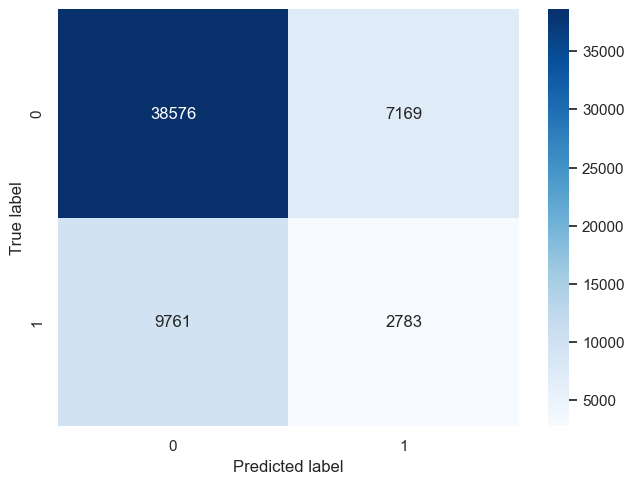

In [120]:
cm=metrics.confusion_matrix(y_test, rfc_pred)
show_metrics()

plot_confusion_matrix()

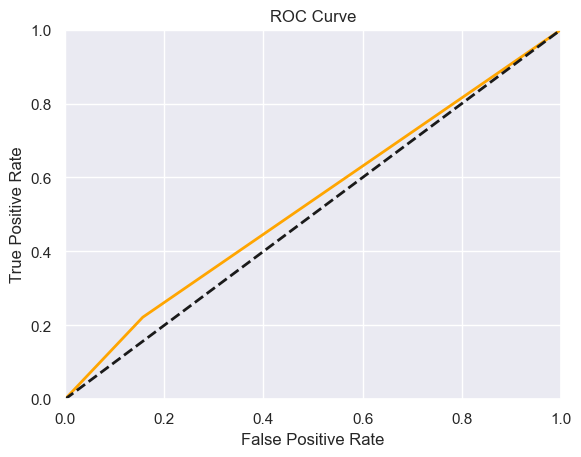

In [121]:
plot_roc(y_test, rfc_pred)

In [122]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

Accuracy of model  0.7095506870936197
F1 Score  0.24742176386913228
Recall Score  0.22185905612244897
AUC Score  0.53257123753767
Balanced Accuracy Score  0.53257123753767


### The accuracy of RF might have gone down by 7% but is predicting defaults better now. 

 <a id="20"></a>
    
<font size="+2" color="indigo"><b>5.2 Upsampling</b></font><br>



Upsampling can be defined as adding more copies of the minority class. Upsampling can be a good choice when you don’t have a ton of data to work with. (Not a good choice here though)

In [123]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [124]:

from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

In [125]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.LOAN_DEFAULT.value_counts()

y_train = upsampled.LOAN_DEFAULT
X_train = upsampled.drop('LOAN_DEFAULT', axis=1)

In [126]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[24438 21307]
 [ 5060  7484]]
55.00000000000001


In [127]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[27177 18568]
 [ 5721  6823]]
57.99999999999999


In [128]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.5833004512000549
F1 Score  0.35972057466719387
Recall Score  0.5439253826530612
AUC Score  0.5690115491251971
Balanced Accuracy Score  0.5690115491251971


In [129]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[40705  5040]
 [10582  1962]]
73.0
Accuracy of model  0.7319905985691983
F1 Score  0.20075718817149288
Recall Score  0.1564094387755102
AUC Score  0.5231167316295302
Balanced Accuracy Score  0.5231167316295302


 <a id="21"></a>
    
<font size="+2" color="indigo"><b>5.3 Downsampling</b></font><br>



Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [130]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [131]:
#Downsample
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.LOAN_DEFAULT.value_counts()

y_train = downsampled.LOAN_DEFAULT
X_train = downsampled.drop('LOAN_DEFAULT', axis=1)

In [132]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[24438 21307]
 [ 5060  7484]]
55.00000000000001


In [133]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[28654 17091]
 [ 6249  6295]]
60.0


In [134]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.5995813961467858
F1 Score  0.3504035624826051
Recall Score  0.5018335459183674
AUC Score  0.5641094716147744
Balanced Accuracy Score  0.5641094716147745


In [135]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[40782  4963]
 [10537  2007]]
73.0
Accuracy of model  0.7340836178352691
F1 Score  0.20569847289125756
Recall Score  0.1599968112244898
AUC Score  0.5257520398892152
Balanced Accuracy Score  0.525752039889215


 <a id="22"></a>
    
<font size="+2" color="indigo"><b>5.4 PCA</b></font><br>



In [136]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [137]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [138]:
pca.explained_variance_ratio_.astype(str)

array(['0.1626582935070612', '0.09903621412229272', '0.07462430773578396',
       '0.07358981469493256', '0.06085225395809794',
       '0.05492265440886832', '0.054173317406915604',
       '0.050860139826426225', '0.04937237829966508',
       '0.048371742087527786', '0.047106943633681356',
       '0.04568138029631013', '0.030792454186137352',
       '0.027879267610843972', '0.026482572171510992',
       '0.025929758169300408', '0.02218006864733693',
       '0.013668751388108457', '0.003768018625633322',
       '0.0035460933355694717', '0.0034366769983810263',
       '0.0025400541925315414', '0.0021101944189278743',
       '0.0020098929032181453', '0.0018506854099092313',
       '0.001781416986869723', '0.0015677351561001781',
       '0.0015197371949381834', '0.0013412339627867558',
       '0.0010616394683435261', '0.0009210425276718671',
       '0.0009079937390059669', '0.000865722100269076',
       '0.0007485076826041395', '0.00044451400038288873',
       '0.0003865189912228064', '0.0

Text(0, 0.5, 'Cumulative variance explained')

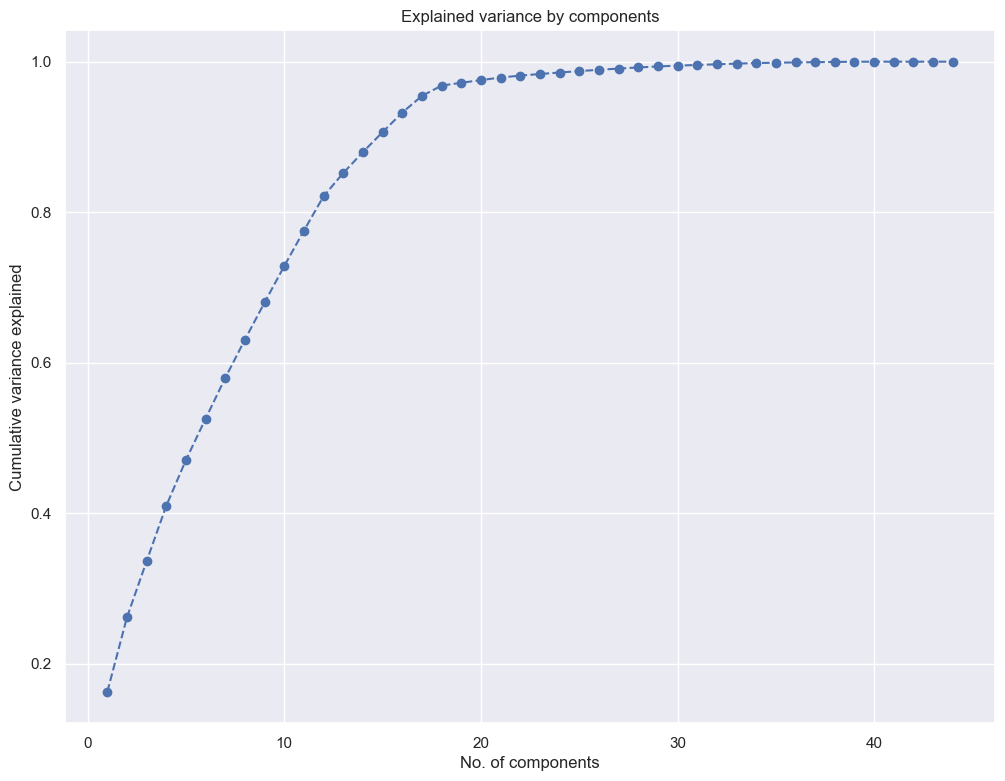

In [139]:
plt.figure(figsize= (12,9))
plt.plot(range(1,45), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("No. of components")
plt.ylabel("Cumulative variance explained")

In [140]:
pca = PCA(n_components = 17)
pca.fit(X)

PCA(n_components=17)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [142]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


In [143]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36480    25]
 [10112    14]]
78.0


In [144]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7826124252106967
F1 Score  0.002754549926217413
Recall Score  0.0013825794983211535
AUC Score  0.5003488709024272
Balanced Accuracy Score  0.5003488709024273


In [145]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[35093  1412]
 [ 9434   692]]
77.0
Accuracy of model  0.7674079475027342
F1 Score  0.11316434995911692
Recall Score  0.06833892948844558
AUC Score  0.5148296482807246
Balanced Accuracy Score  0.5148296482807246


 <a id="23"></a>
    
<font size="+2" color="indigo"><b>5.5 Resampling</b></font><br>



In [146]:
y = train_dummy[['LOAN_DEFAULT']]
X= train_dummy.loc[:, train_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [147]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.LOAN_DEFAULT==0]
fraud = X[X.LOAN_DEFAULT==1]

In [148]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [149]:
# check new class counts
upsampled.LOAN_DEFAULT.value_counts()

0    146038
1    146038
Name: LOAN_DEFAULT, dtype: int64

In [150]:
y_train = upsampled.LOAN_DEFAULT
X_train = upsampled.drop('LOAN_DEFAULT', axis=1)

In [151]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18007 18498]
 [ 3464  6662]]
53.0


In [152]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.5290257553987691
F1 Score  0.3776001813750496
Recall Score  0.657910329843966
AUC Score  0.5755926118470618
Balanced Accuracy Score  0.5755926118470618


In [153]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11751 24754]
 [ 1993  8133]]
43.0


In [154]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("AUC Score ",metrics.roc_auc_score(y_test,sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.4264116145911518
F1 Score  0.3781647408922884
Recall Score  0.8031799328461386
AUC Score  0.562540521141601
Balanced Accuracy Score  0.562540521141601


## Comparing all the models based on Model Performance

In [167]:
comparison_frame = pd.DataFrame({'Model':['Test_accuracy                :',
                                          'Test_F1_Score                :',
                                          'Test_Recall_Score            :',
                                          'Test_AUC_Score               :',
                                          'Test_Balanced_Accuracy_Score:'], 
                                          'Logisitic Regression':[0.78289,0.00842,0.00424,0.50156,0.50156],
                                          'Random Forest':[0.76787,0.11423,0.06893, 0.51534,0.51534],
                                          'Naive Bayes':[ 0.34018,0.36774,0.88366,0.53654, 0.53654],
                                          'Stochastic Gradient Descent':[0.78261, 0.00275,0.00138,0.50034, 0.50034],   
                                          'Decision Tree ':[0.77984,0.03296,0.01728,0.50432,0.50432], 
                                          'Decision Tree (SMOTE)':[0.55609,0.36027,0.58083,0.56507,0.56507],  
                                          'Random Forest (SMOTE)':[ 0.70955,0.24742,0.22185,0.53257,0.53257],  
                                          'Random Forest (Upsampling)':[ 0.73343,0.35972,0.54392,0.56901,0.56901],  
                                          'Random Forest (Downsampling) ':[0.59958,0.35040,0.50183,0.56410,0.56410]})  

comparison_frame


,Model,Logisitic Regression,Random Forest,Naive Bayes,Stochastic Gradient Descent,Decision Tree,Decision Tree (SMOTE),Random Forest (SMOTE),Random Forest (Upsampling),Random Forest (Downsampling)
0,Test_accuracy :,0.78289,0.76787,0.34018,0.78261,0.77984,0.55609,0.70955,0.73343,0.59958
1,Test_F1_Score :,0.00842,0.11423,0.36774,0.00275,0.03296,0.36027,0.24742,0.35972,0.35040
2,Test_Recall_Score :,0.00424,0.06893,0.88366,0.00138,0.01728,0.58083,0.22185,0.54392,0.50183
3,Test_AUC_Score :,0.50156,0.51534,0.53654,0.50034,0.50432,0.56507,0.53257,0.56901,0.56410
4,Test_Balanced_Accuracy_Score:,0.50156,0.51534,0.53654,0.50034,0.50432,0.56507,0.53257,0.56901,0.56410


# Results interpretation :

### Logisitic Regression - Accuracy score is good, however the model is not predicting the Defaults well
### Random Forest - Accuracy score is good, however the model is predicting the Defaults better than Logistic reg
### Naive Bayes - Model accuracy is very poor
### Stochastic Gradient Descent  &  Decision Tree - Accuracy score is good, however the model is not predicting the Defaults well

### Random Forest (SMOTE) - The accuracy of RF might have gone down by 7% but is predicting defaults better. (SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.)

#### Note:   Upsampling & Undersampling results , i haven't considered due to the following reasons 
####  Upsampling can be defined as adding more copies of the minority class. Upsampling can be a good choice when you don’t have a ton of data to work with. (Not a good choice here though)

#### Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.




# Best result is obtained by Random Forest after deploying [ SMOTE ].